In [1]:
from underlying import Underlying, NonTradedUnderlying
from option import Option, Vanilla, Vanilla_on_NonTraded
from trader import Trader

import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm
from quantile_hedging_calculator import *
import numpy as np
import pandas as pd

from IPython import display
from time import sleep

In [2]:
mu_nt = 0.06
mu_t = 0.06
sigma_nt =  0.3
sigma_t =  0.3
r = 0.05
X0_nt = 100
X0_t = 100
T = 1
K = 100
repeat = 10000
values_per_year = 250

In [3]:
underlying_t = Underlying(mu_t, sigma_t, r, values_per_year)

In [4]:
rho = 0.9999999999
underlying_nt = NonTradedUnderlying(mu_t, sigma_t, underlying_t, rho)

In [5]:
call_nt = Vanilla_on_NonTraded(underlying_nt, K, T, True)
put_nt = Vanilla_on_NonTraded(underlying_nt, K, T, False)

In [6]:
call_vanilla = Vanilla(underlying_t, K, T, True)
put_vanilla = Vanilla(underlying_t, K, T, False)

In [7]:
print(call_nt.get_MC_price(X0_t, X0_nt))
print(call_vanilla.get_price(X0_t))

13.30171655323539
14.231254785985819


In [8]:
print(put_nt.get_MC_price(X0_t, X0_nt))
print(put_vanilla.get_price(X0_t))

9.344290138945079
9.354197236057232


In [9]:
rho_call = dict()
for rho in [-0.999, -0.75, 0, 0.75, 0.999]:
    underlying_nt = NonTradedUnderlying(mu_nt, sigma_nt, underlying_t, rho)
    rho_call[rho] = Vanilla_on_NonTraded(underlying_nt, K, T, True)

100%|████████████████████████████████████████| 200/200 [00:01<00:00, 198.21it/s]


Text(0.5, 1.0, 'Vanilla call on untradable underlying\nprice depending on m for different correlations rho')

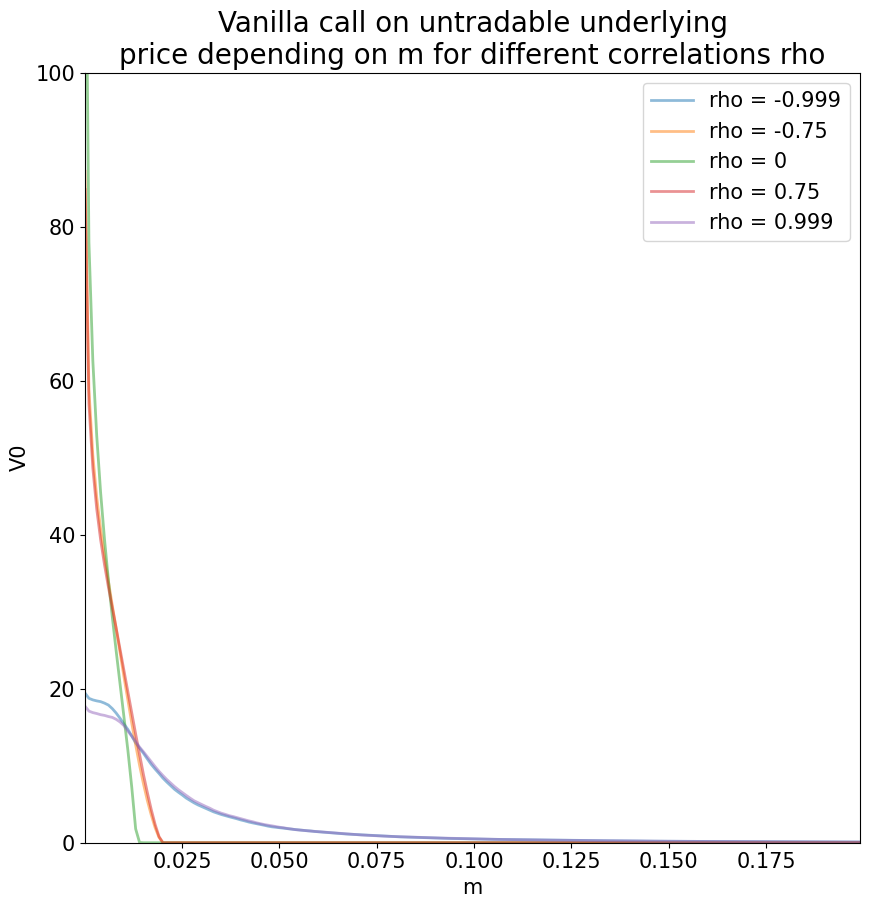

In [93]:
m_s = np.arange(0.0001, 0.2, 0.001)
plt.figure(figsize=(10,10))
plt.xlabel('m', size = 15)
plt.xlim([np.min(m_s), np.max(m_s)])    
plt.xticks(size = 15)
plt.ylabel('V0', size = 15)
plt.ylim([0, 100])
plt.yticks(size = 15)
for num, rho in enumerate(rho_call):
    prices = []
    for m in tqdm(m_s):
        rho_call[rho].m = m
        V0 = rho_call[rho].get_MC_price(X0_t, X0_nt)
        prices.append(V0)
    plt.plot(m_s, prices, lw = 2, label = f'rho = {rho}', alpha = 0.5)
plt.legend(fontsize = 15)
plt.title('Vanilla call on untradable underlying\nprice depending on m for different correlations rho',size = 20)

In [94]:
rho_put = dict()
for rho in [-0.999, -0.75, 0, 0.75, 0.99]:
    underlying_nt = NonTradedUnderlying(mu_nt, sigma_nt, underlying_t, rho)
    rho_put[rho] = Vanilla_on_NonTraded(underlying_nt, K, T, False)

100%|████████████████████████████████████████| 200/200 [00:00<00:00, 211.12it/s]


Text(0.5, 1.0, 'Vanilla put on untradable underlying\nprice depending on m for different correlations rho')

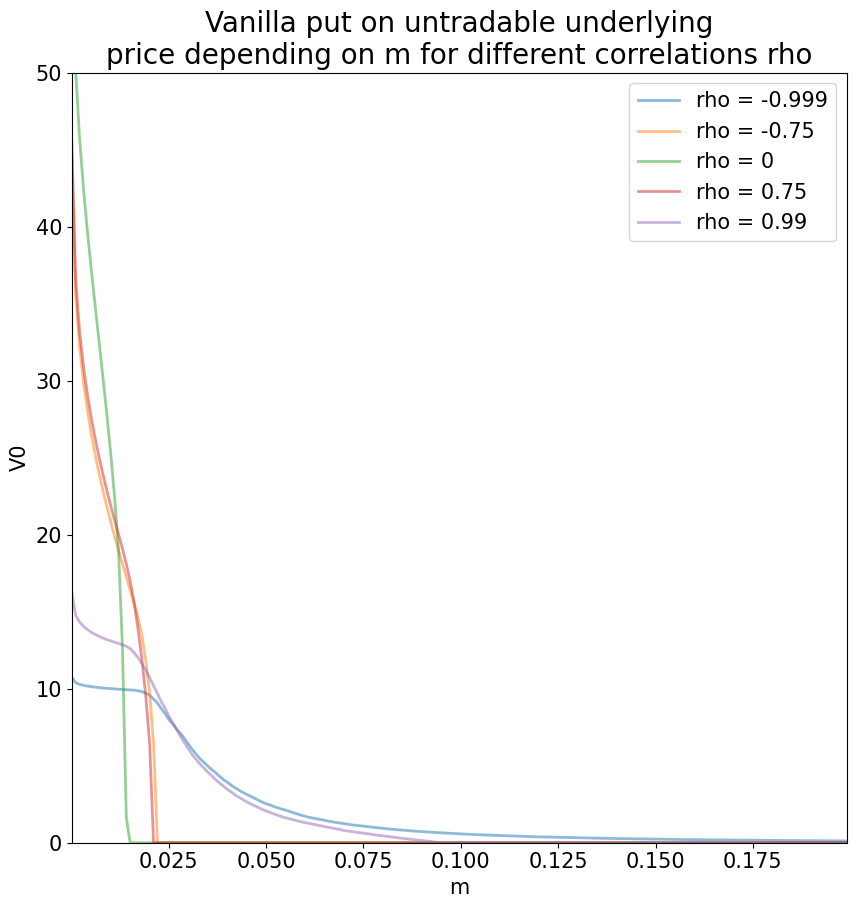

In [95]:
plt.figure(figsize=(10,10))
plt.xlabel('m', size = 15)
plt.xlim([np.min(m_s), np.max(m_s)])    
plt.xticks(size = 15)
plt.ylabel('V0', size = 15)
plt.ylim([0, 50])
plt.yticks(size = 15)
m_s = np.arange(0.0001, 0.2, 0.001)
for num, rho in enumerate(rho_put):
    prices = []
    for m in tqdm(m_s):
        rho_put[rho].m = m
        V0 = rho_put[rho].get_MC_price(X0_t, X0_nt)
        prices.append(V0)
    plt.plot(m_s, prices, lw = 2, label = f'rho = {rho}', alpha = 0.5)
plt.legend(fontsize = 15)
plt.title('Vanilla put on untradable underlying\nprice depending on m for different correlations rho',size = 20)

In [96]:
rho = 0.5
underlying_nt = NonTradedUnderlying(mu_nt, sigma_nt, underlying_t, rho)

In [97]:
[_, reality_t], _ = underlying_nt.simulate_together_P(repeat, T)

In [98]:
call_nt = Vanilla_on_NonTraded(underlying_nt, K, T, True)
put_nt = Vanilla_on_NonTraded(underlying_nt, K, T, False)

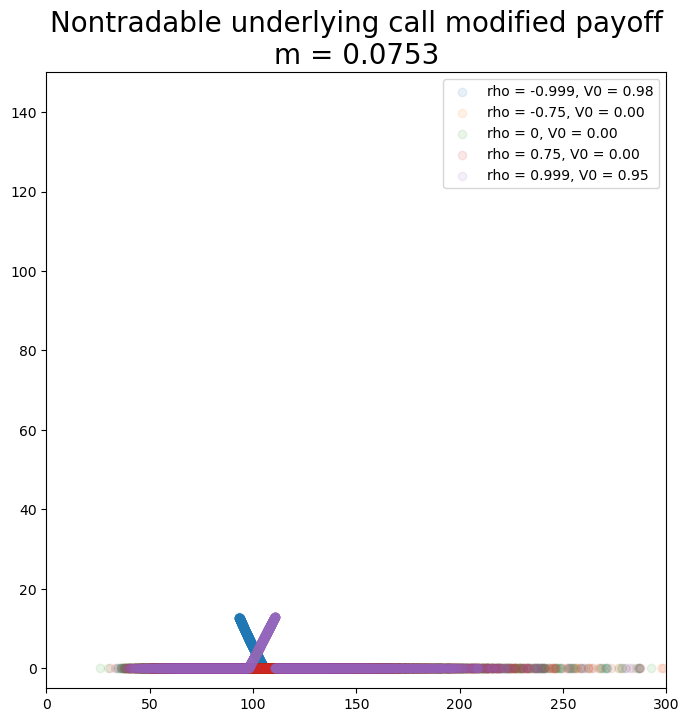

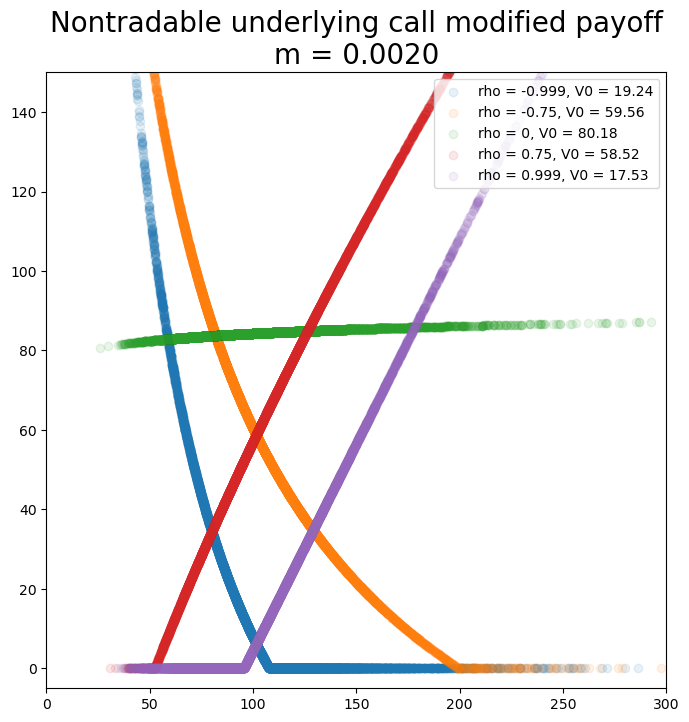

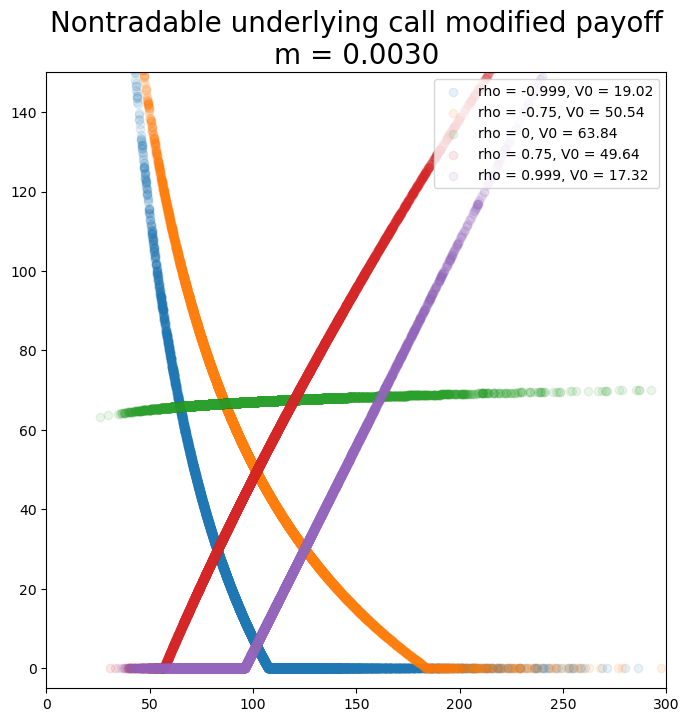

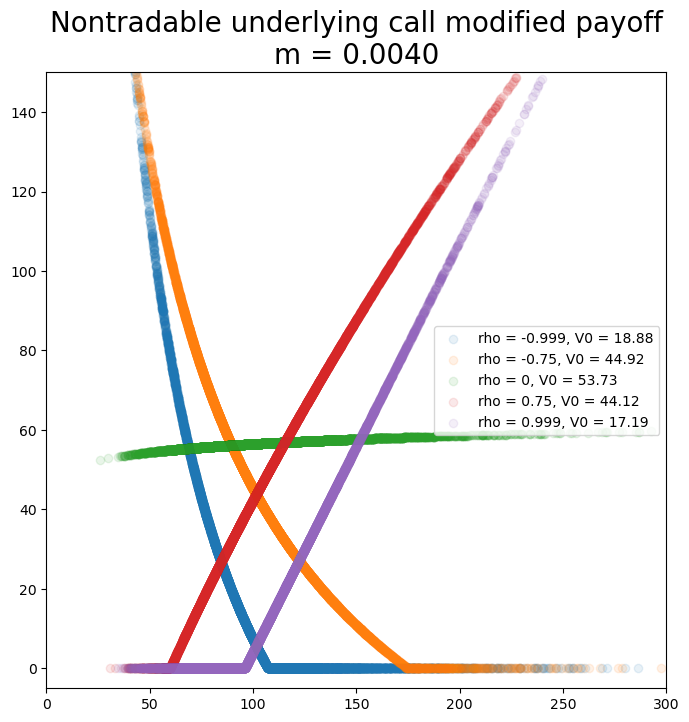

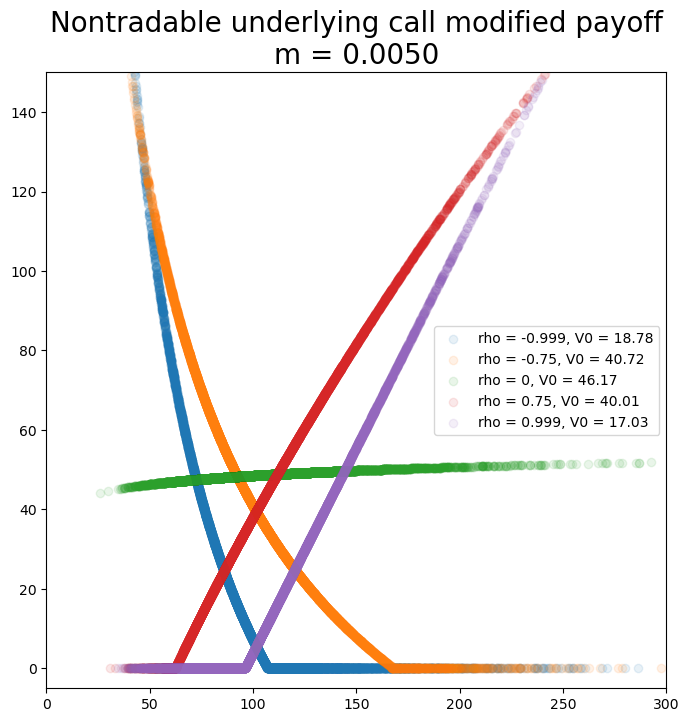

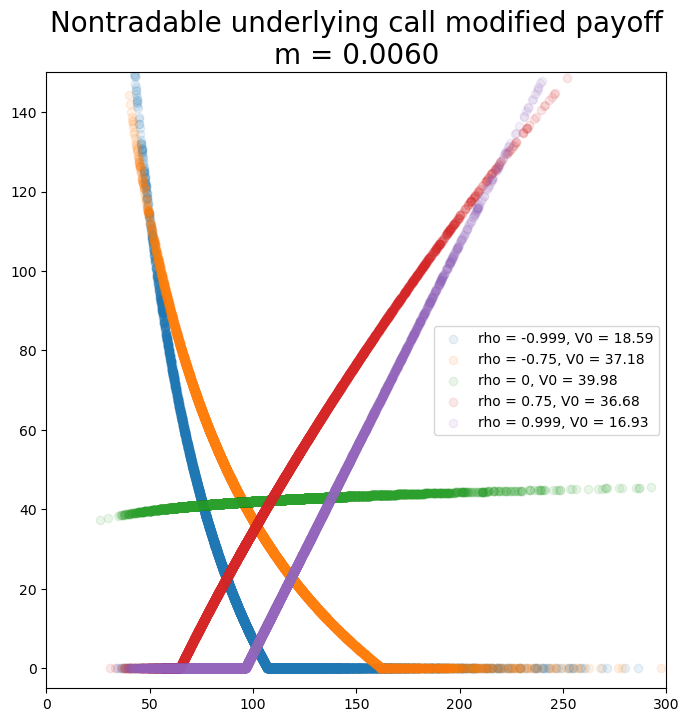

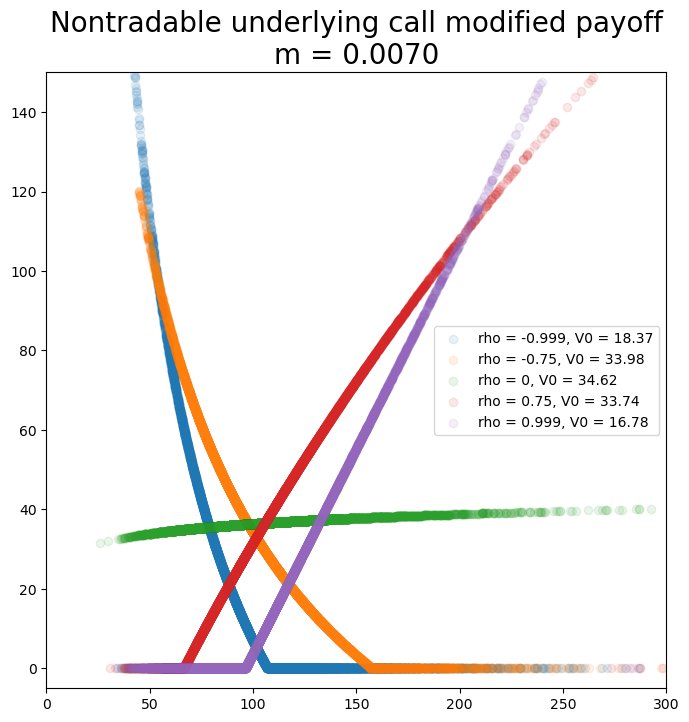

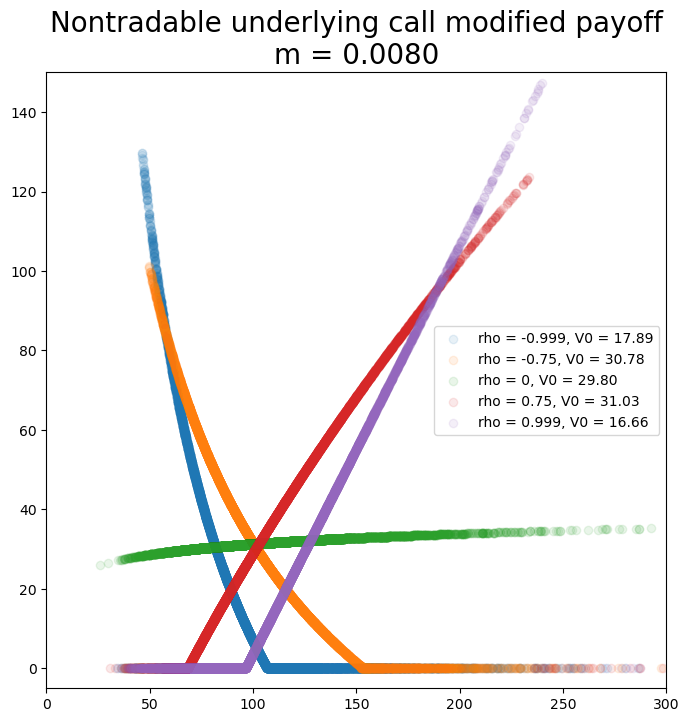

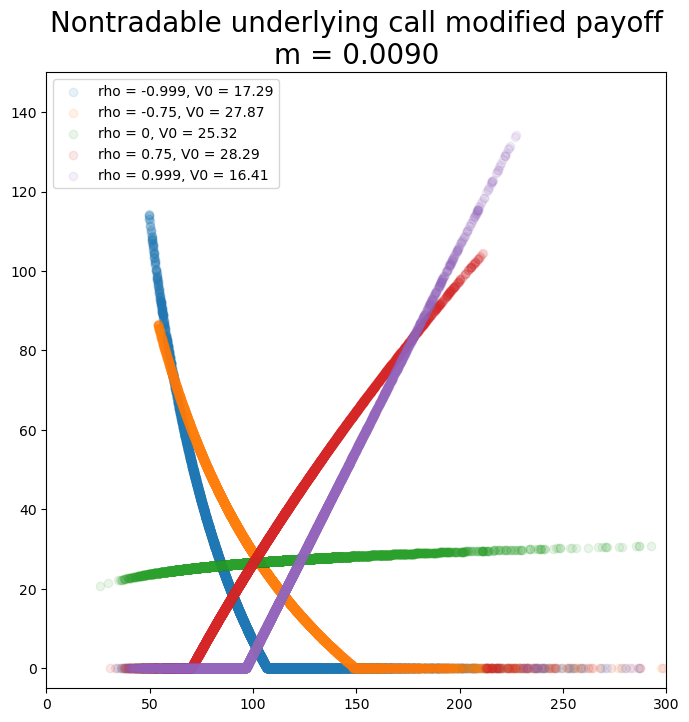

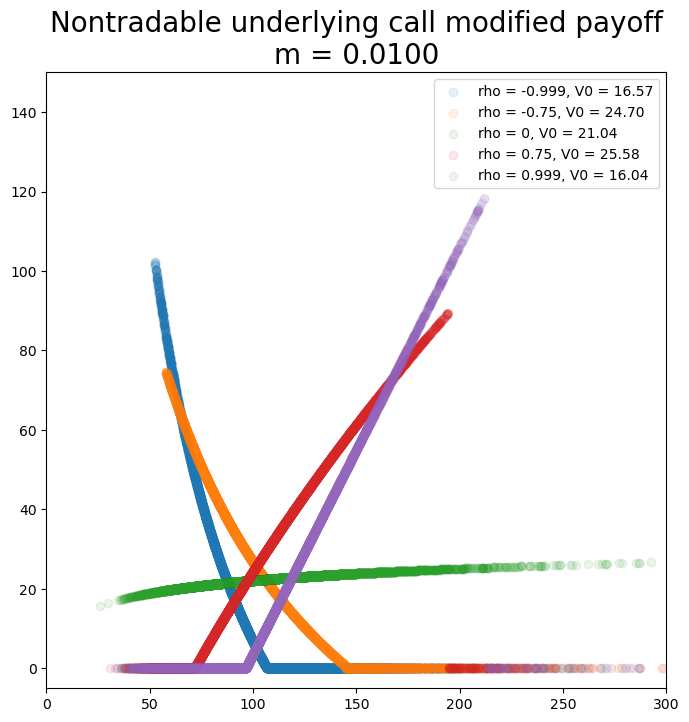

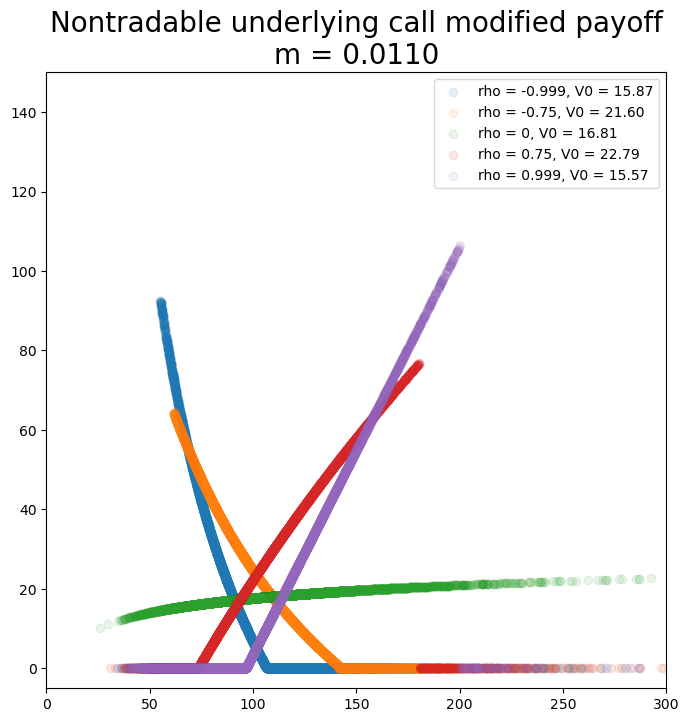

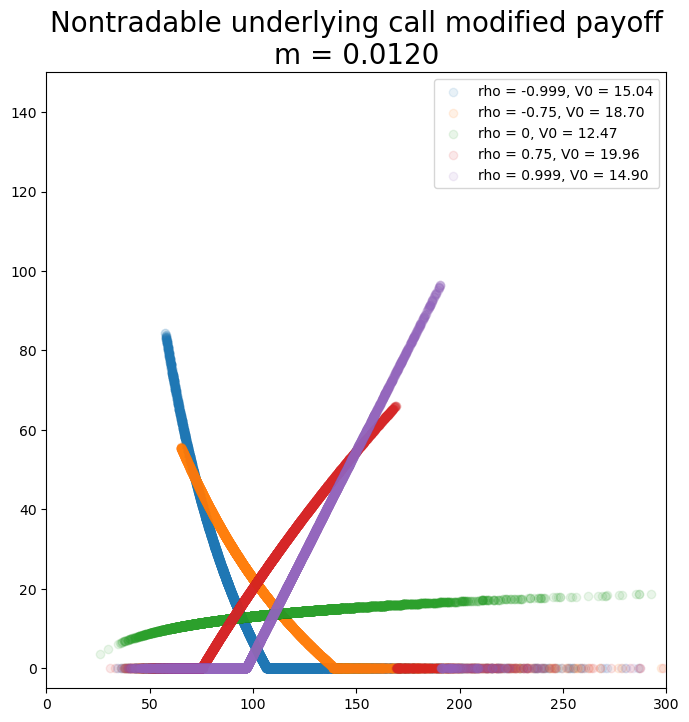

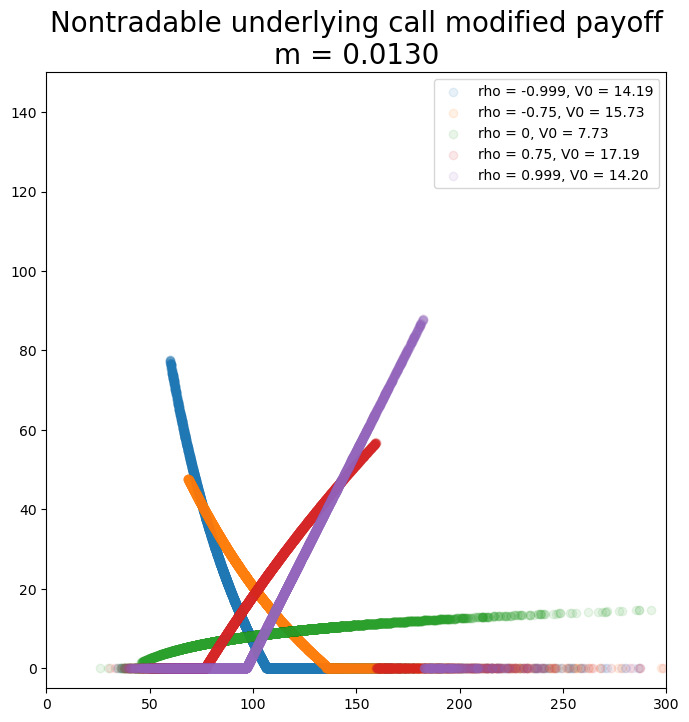

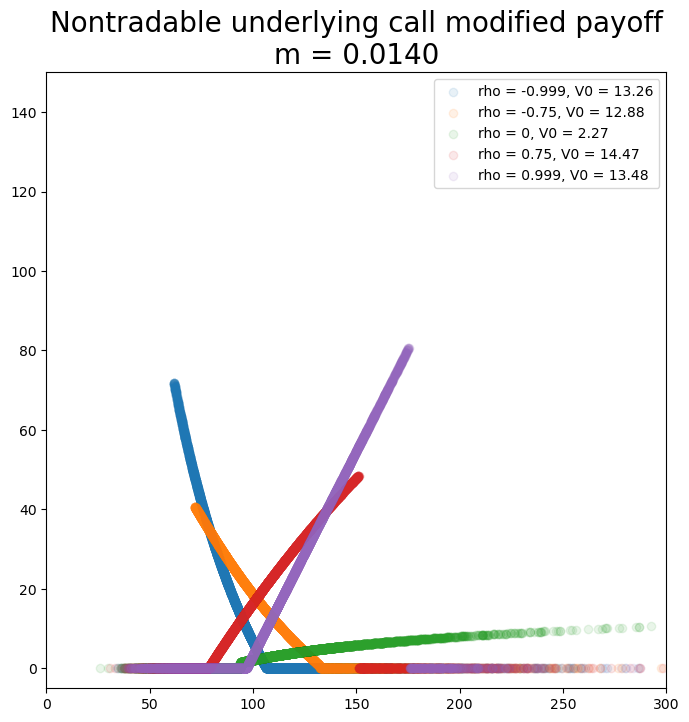

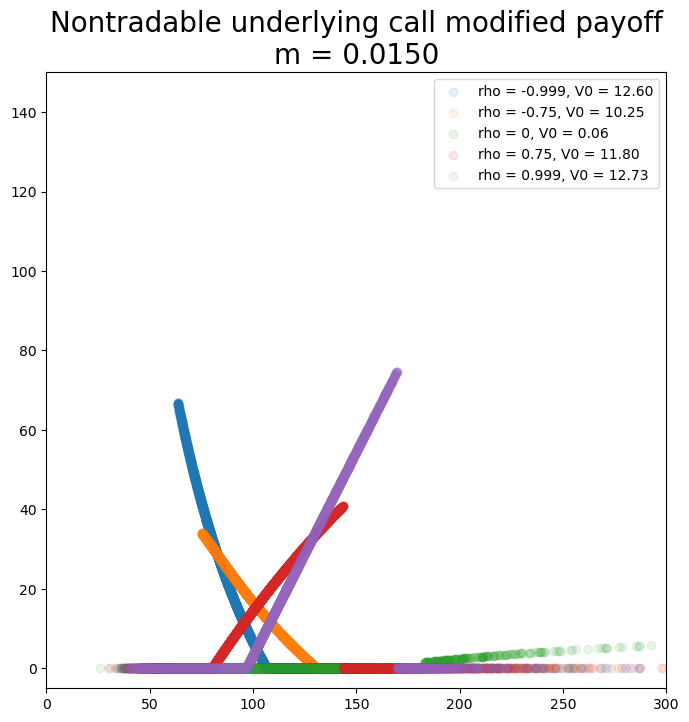

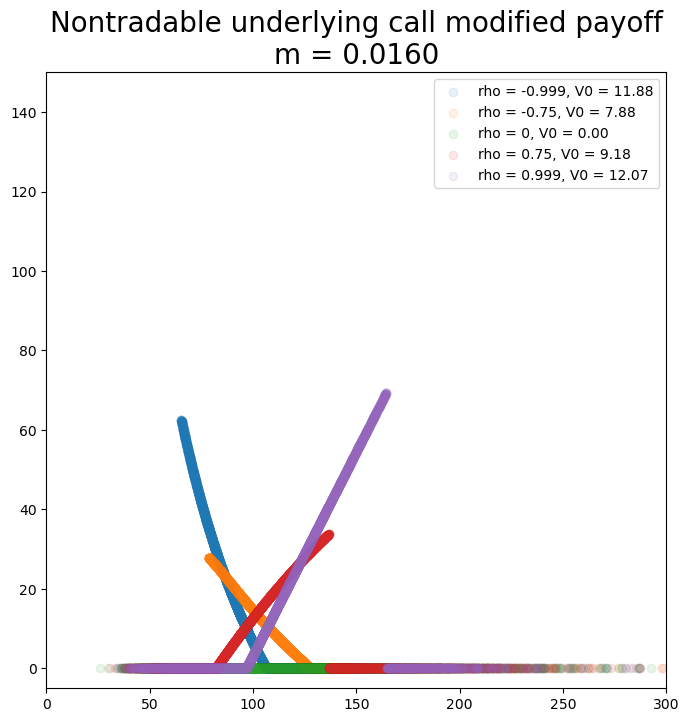

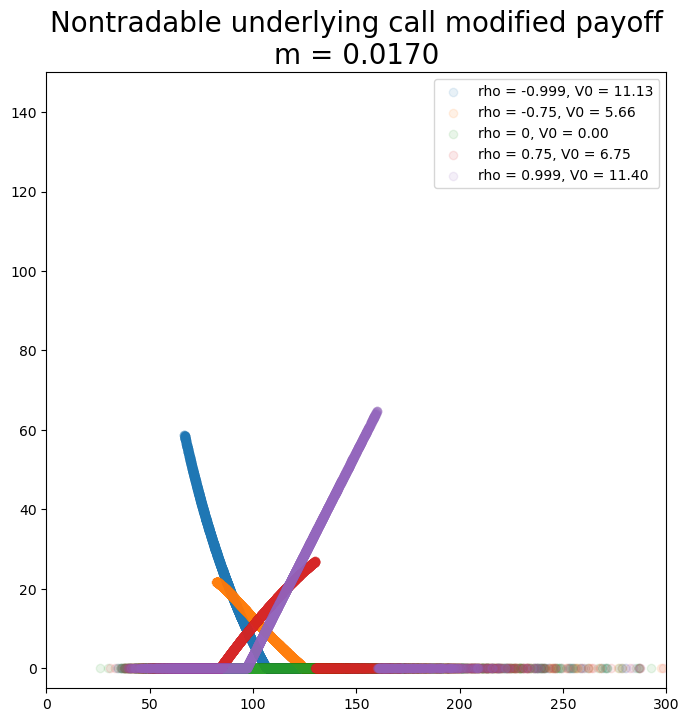

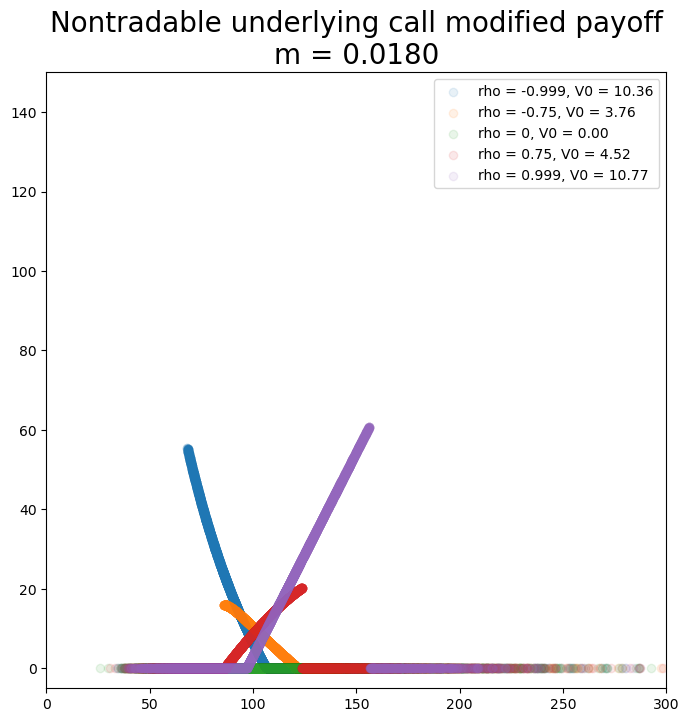

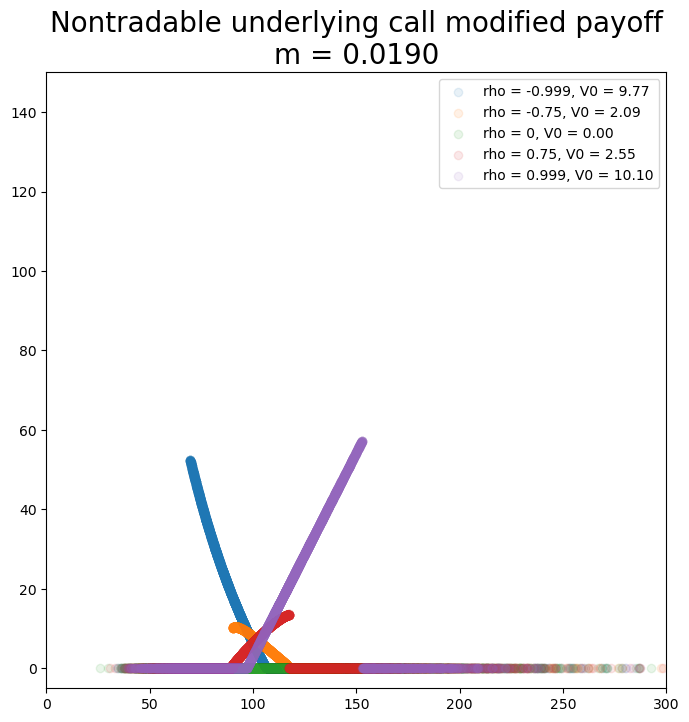

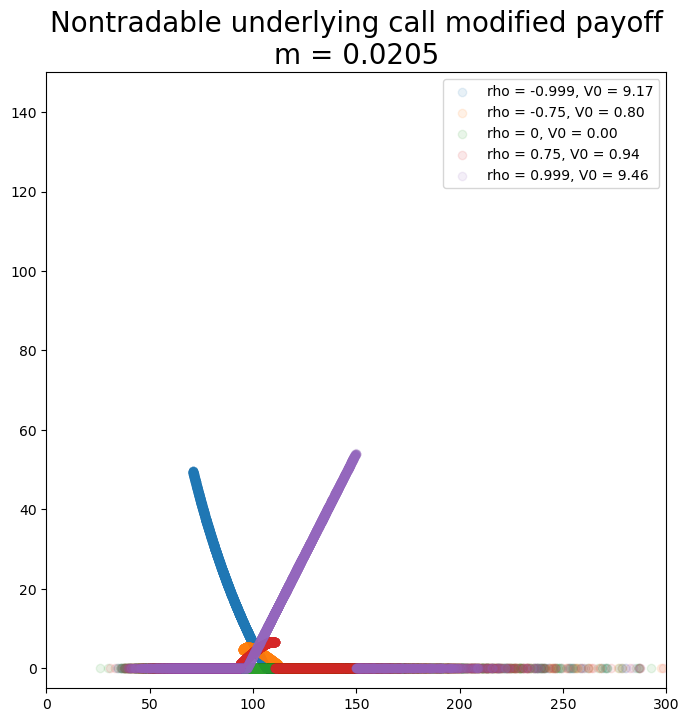

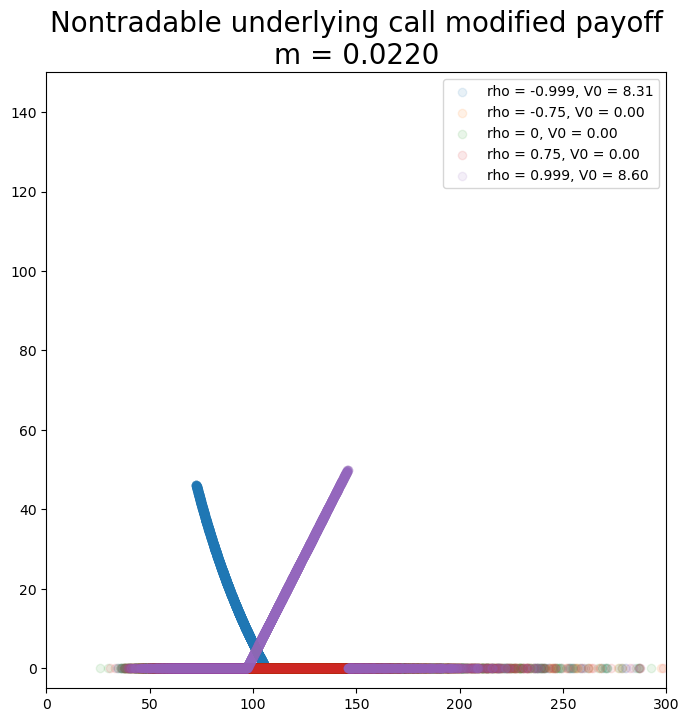

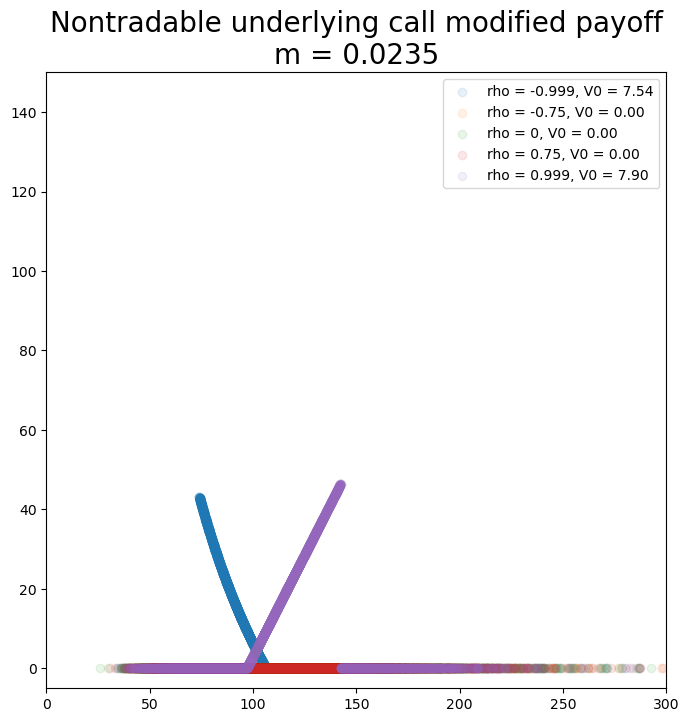

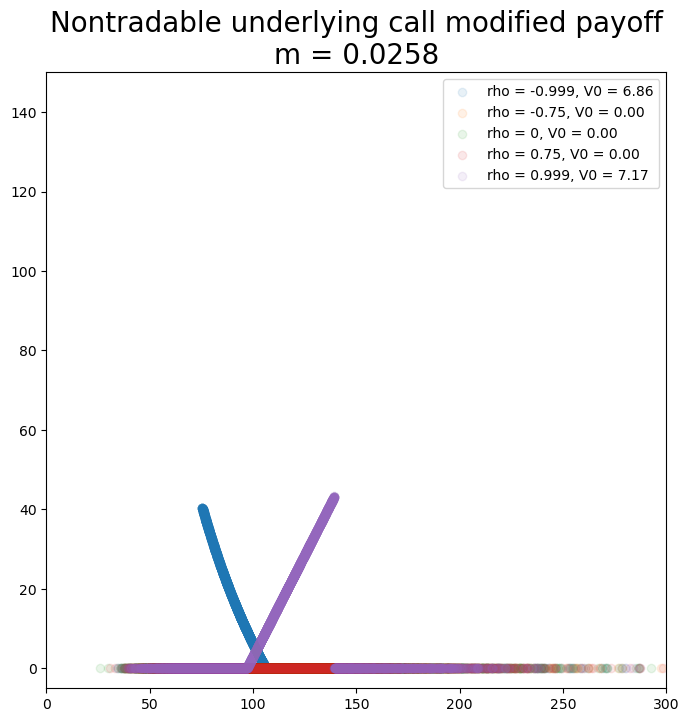

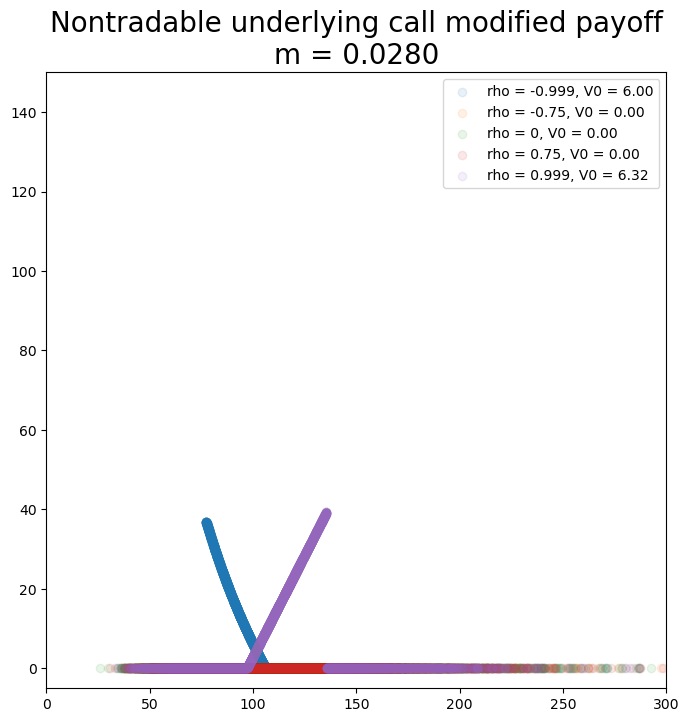

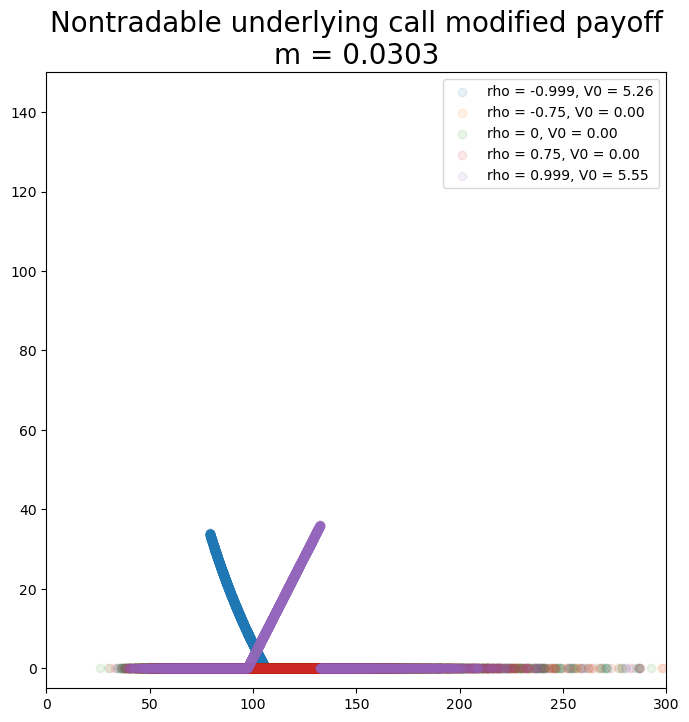

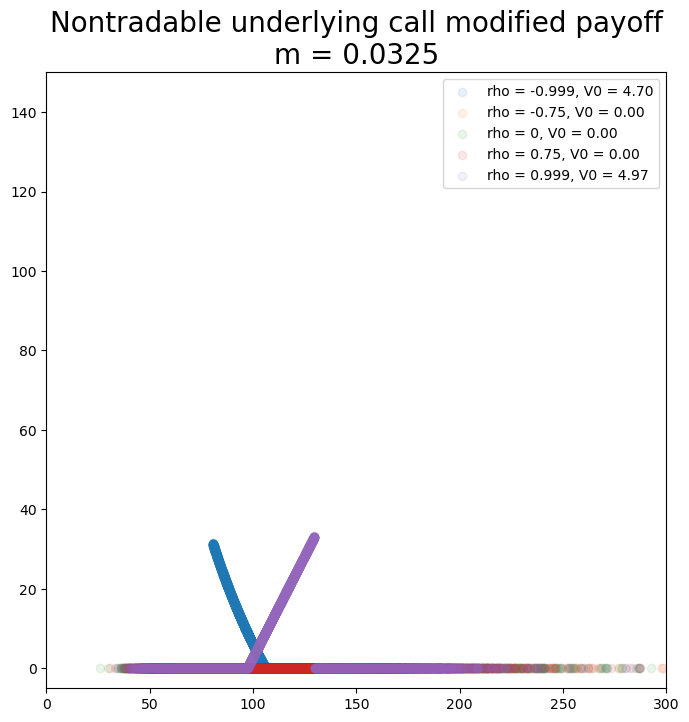

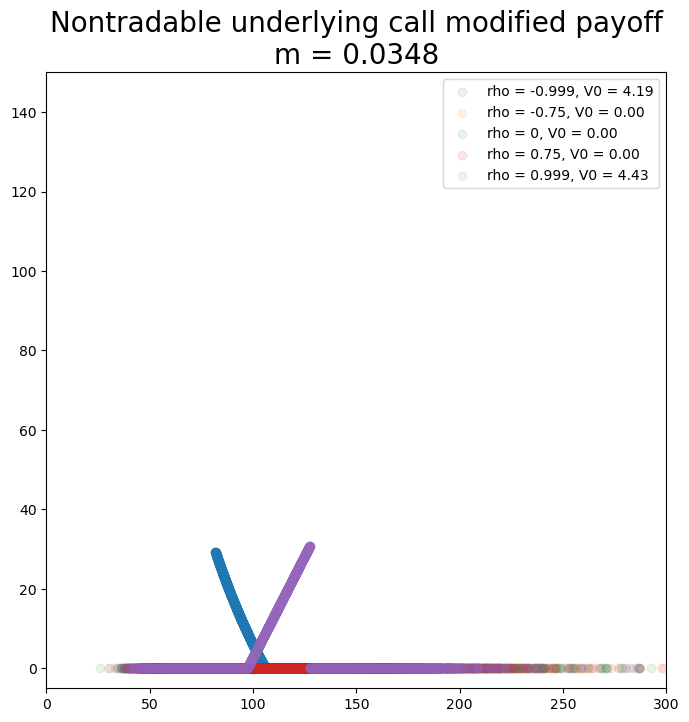

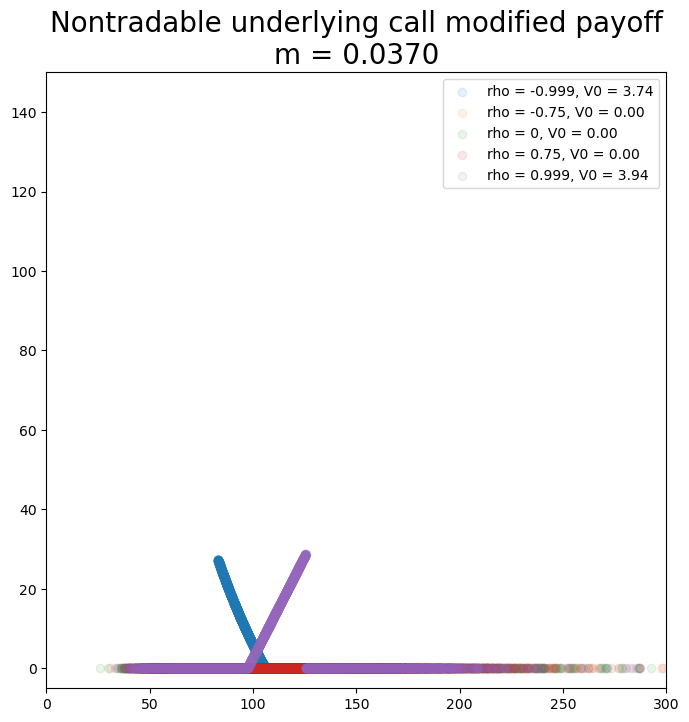

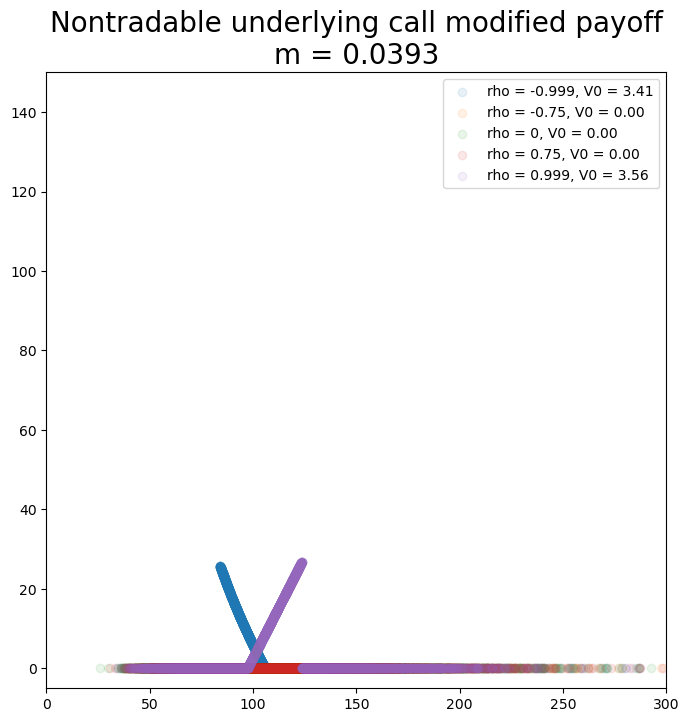

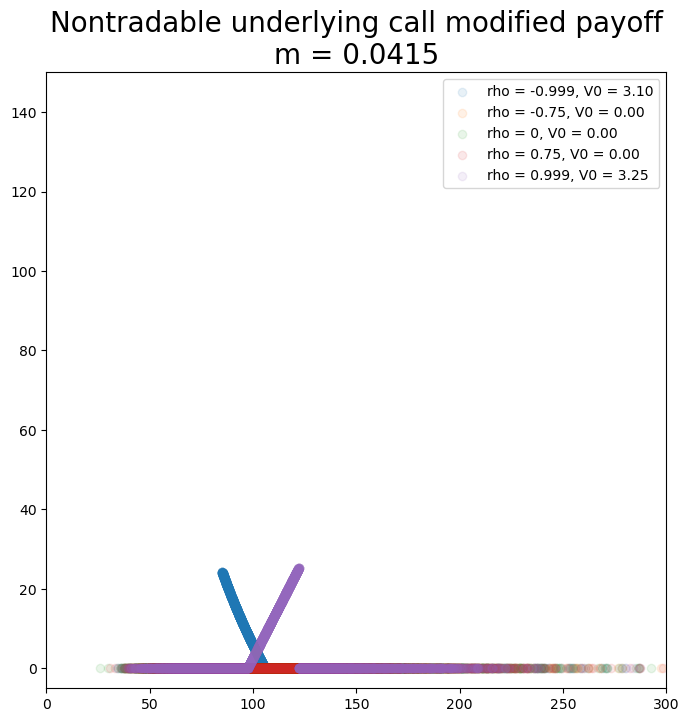

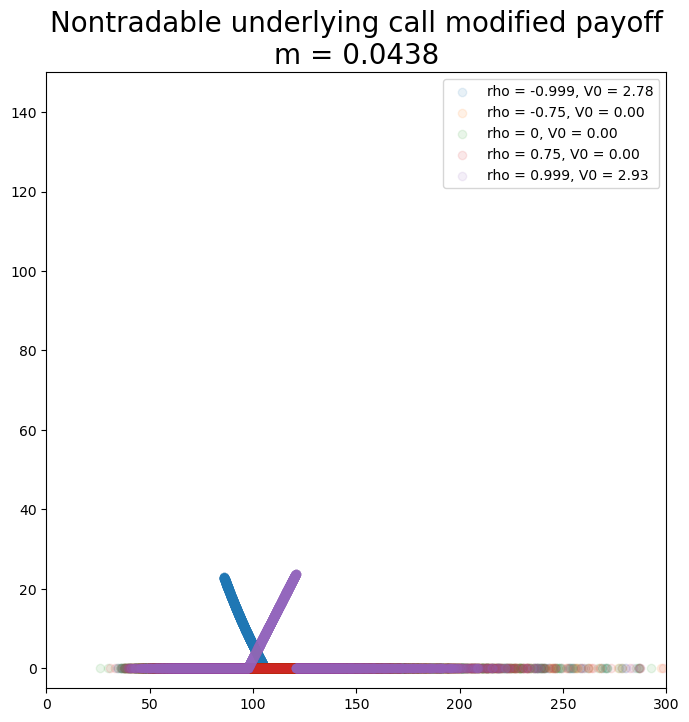

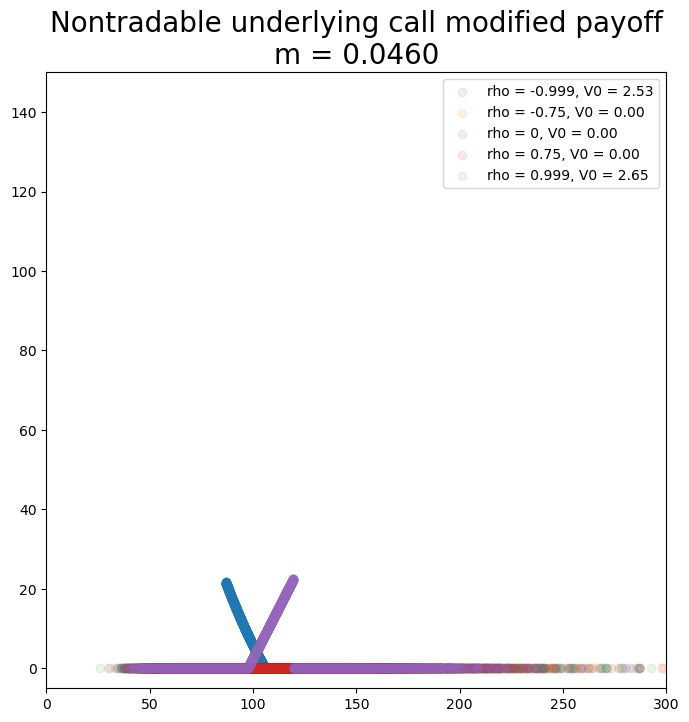

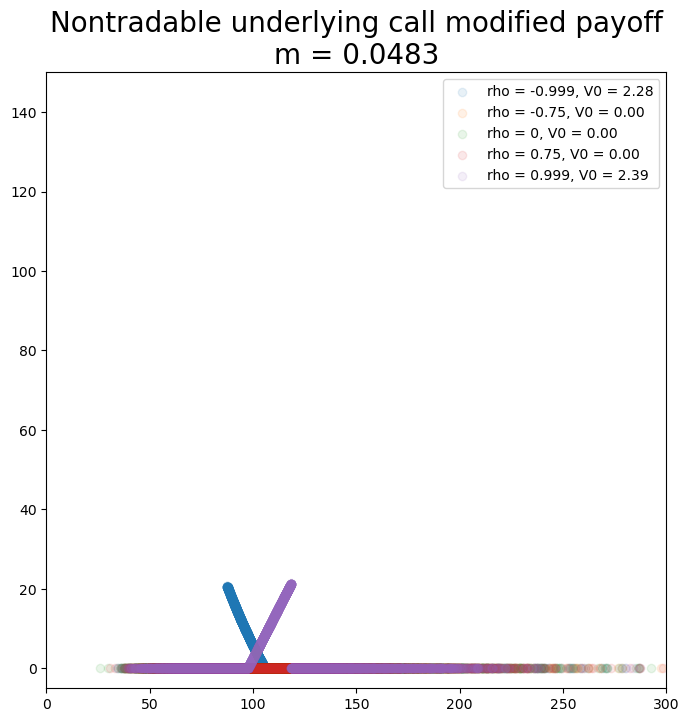

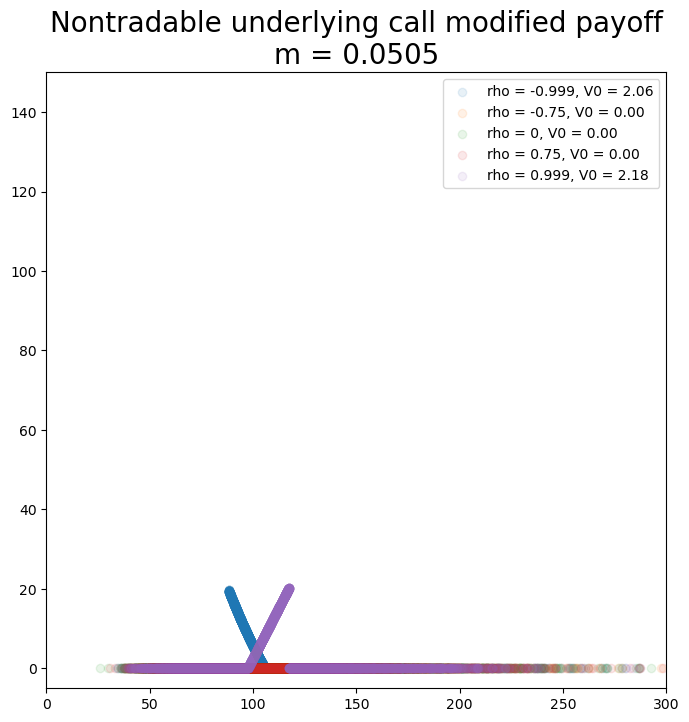

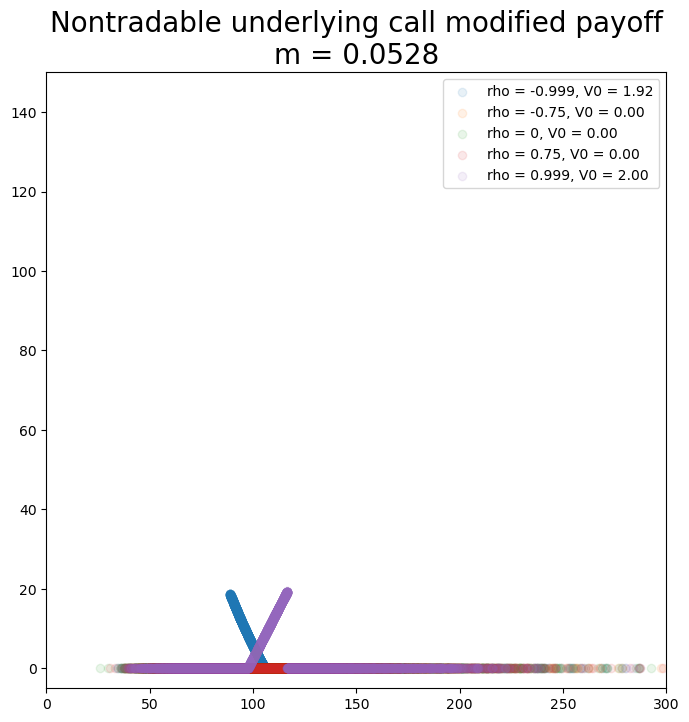

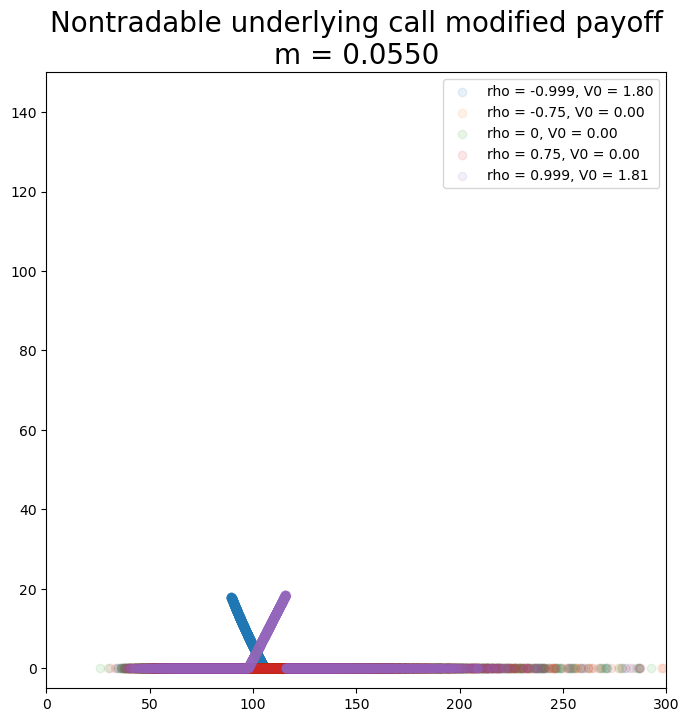

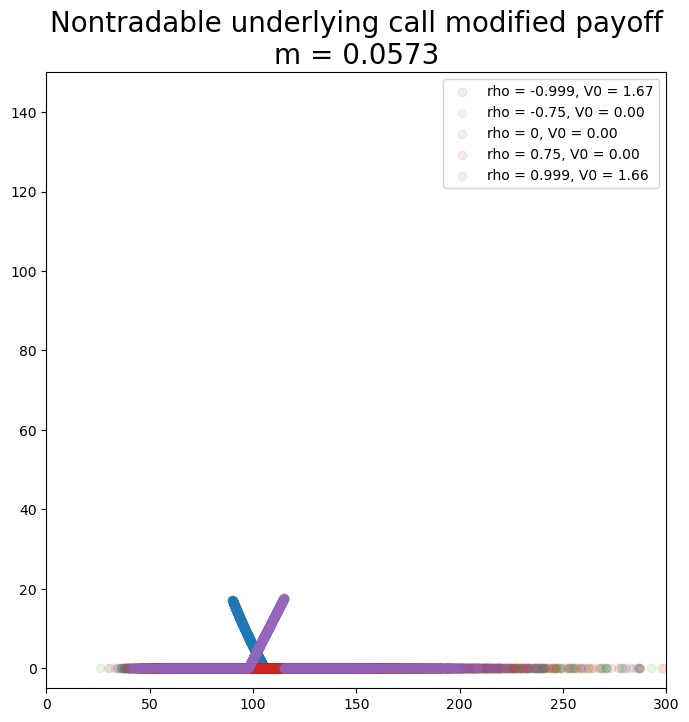

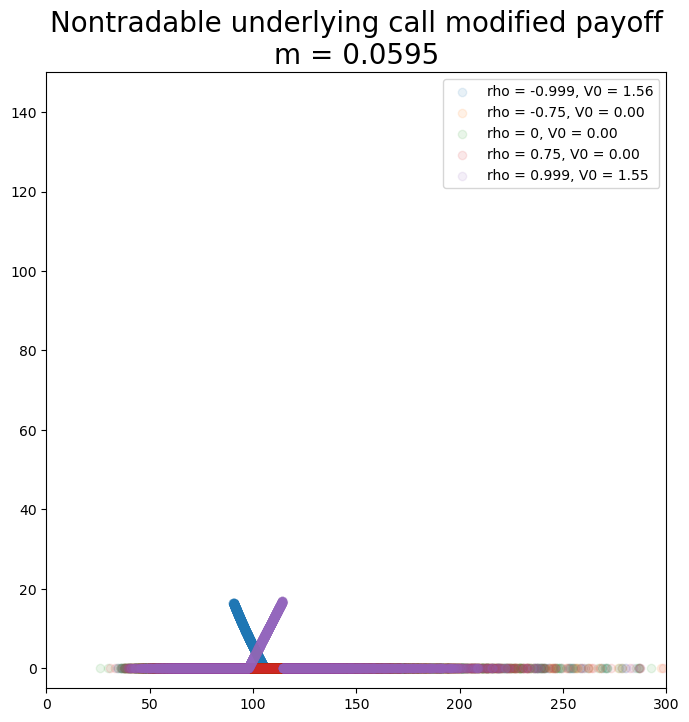

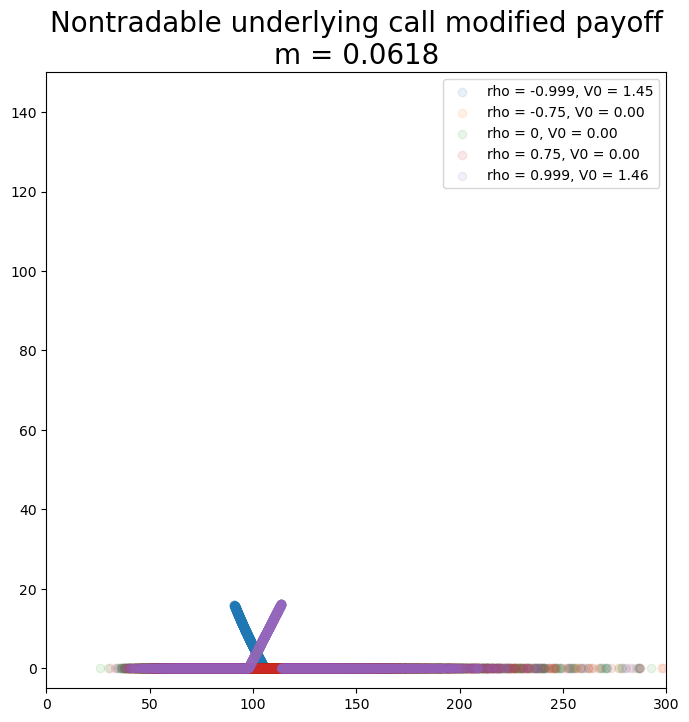

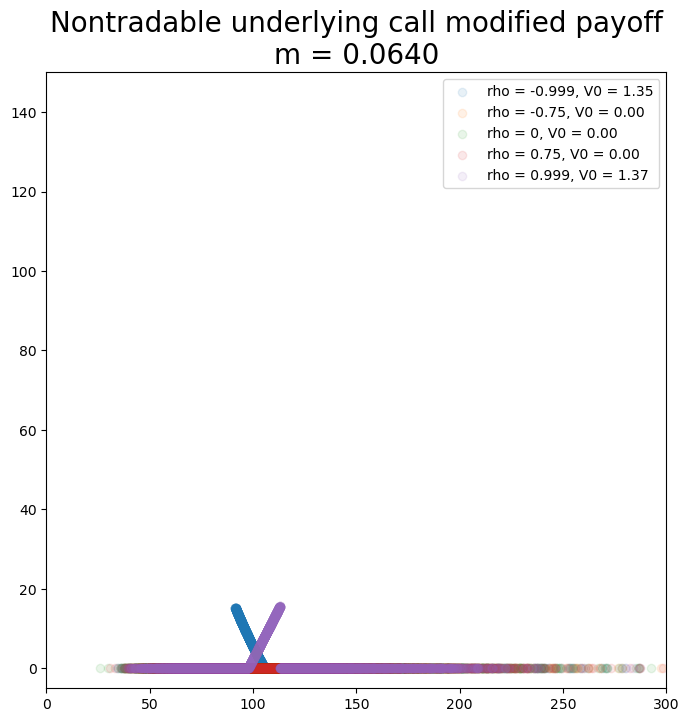

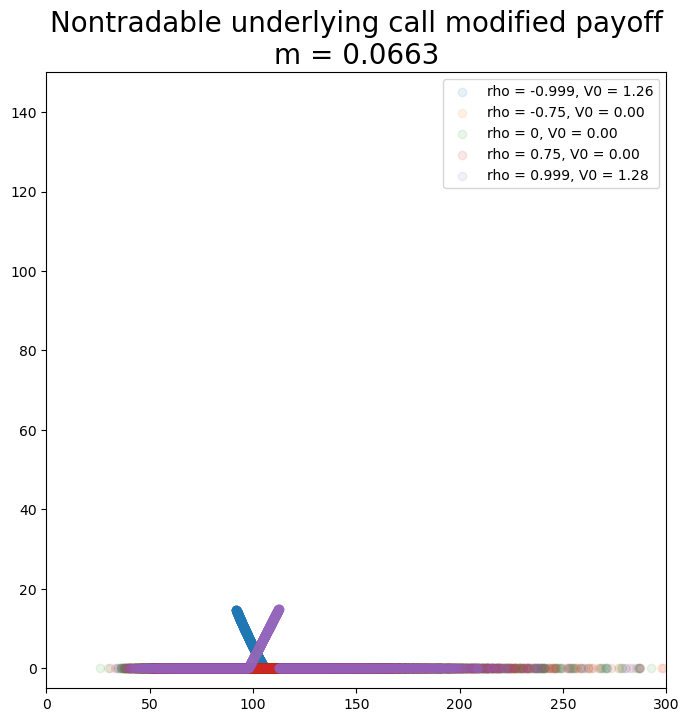

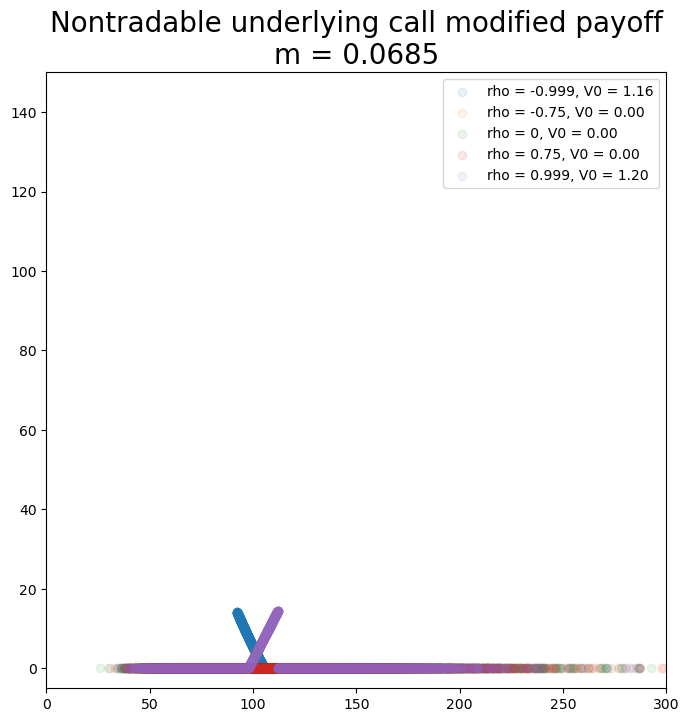

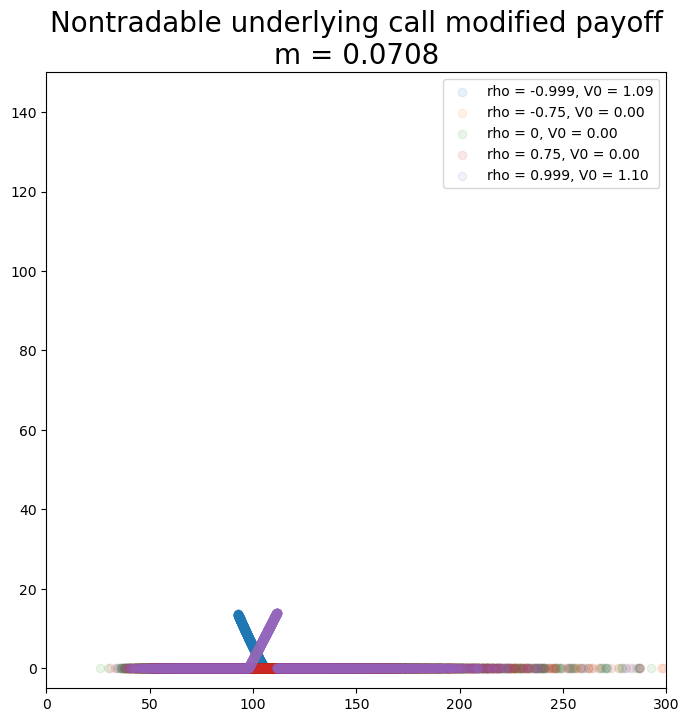

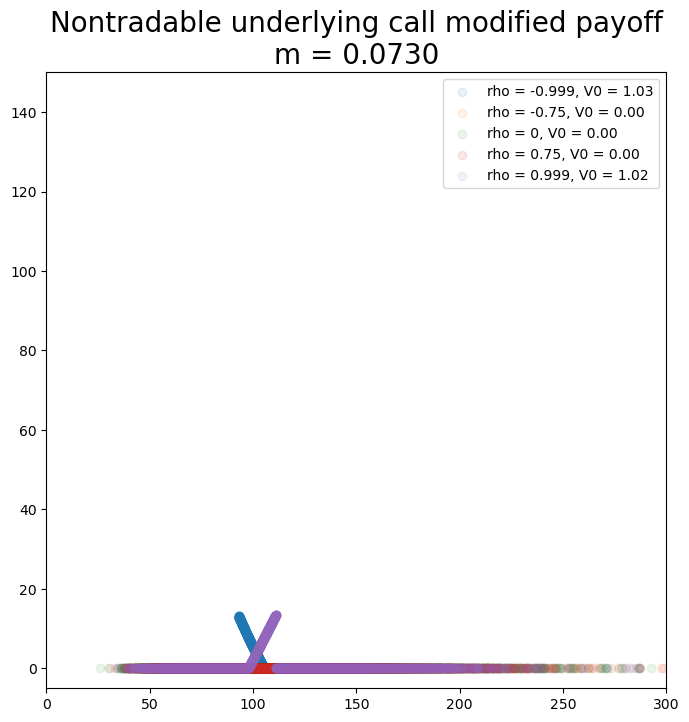

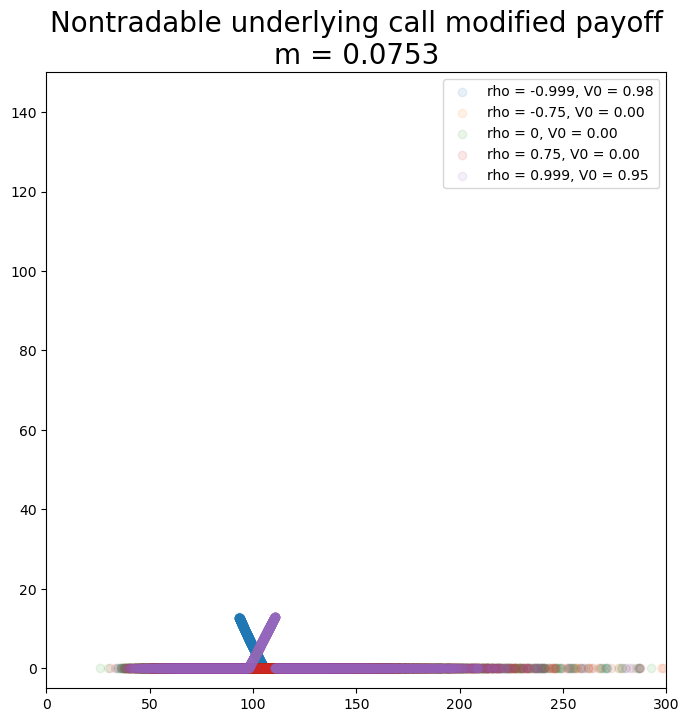

In [99]:
m = 0.001
diff = 0.001
rate = 1.5
V0_prev = 5 * [np.infty]
i = 0
while True:
    plt.figure(figsize=(8,8))
    for num, rho in enumerate(rho_call):
        option = rho_call[rho]
        final_index = round(option.underlying.values_per_year * option.T + 1)
        _, sims_full_t = option.MC_setup[0]
        sims_t = sims_full_t.iloc[:repeat,:final_index]
        option.m = m
        payoff = option.payoff_special(X0_t * sims_t, X0_nt)
        V0 = np.exp(-option.underlying.r * option.T) * payoff.mean()
        if abs(V0 - V0_prev[num]) < 0.1:
            i += 1
        V0_prev[num] = V0
        plt.scatter((X0_t * sims_t).iloc[:,-1], payoff, label = f'rho = {rho}, V0 = {V0:.2f}', alpha = 0.1)
    m += diff
    if i == 5:
        i = 0
        diff *= rate
    plt.title(f'Nontradable underlying call modified payoff\nm = {m:.4f}', size = 20)
    plt.xlim([0,300])
    plt.ylim([-5,150])
    plt.legend()
    display.clear_output(wait = True)
    display.display(plt.gcf())
    sleep(0.25)
    if np.max(np.array(V0_prev)) < 1:
        break

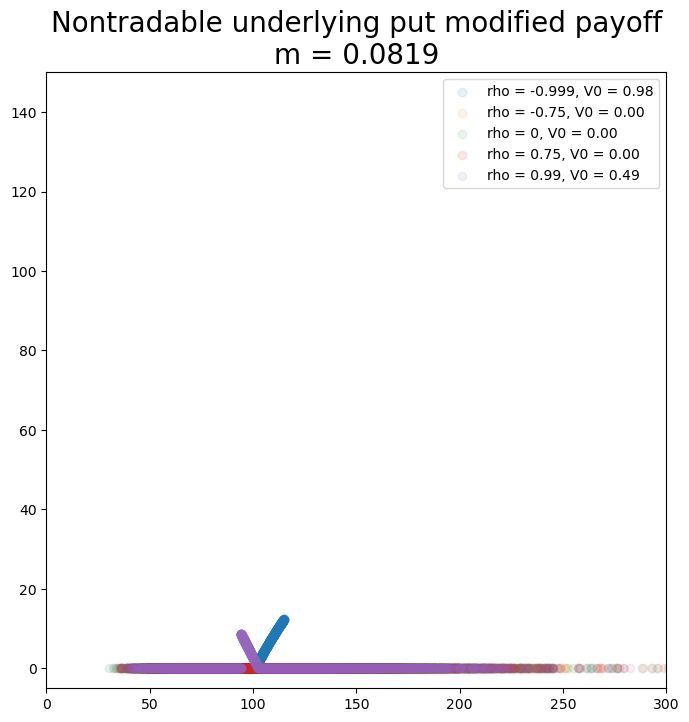

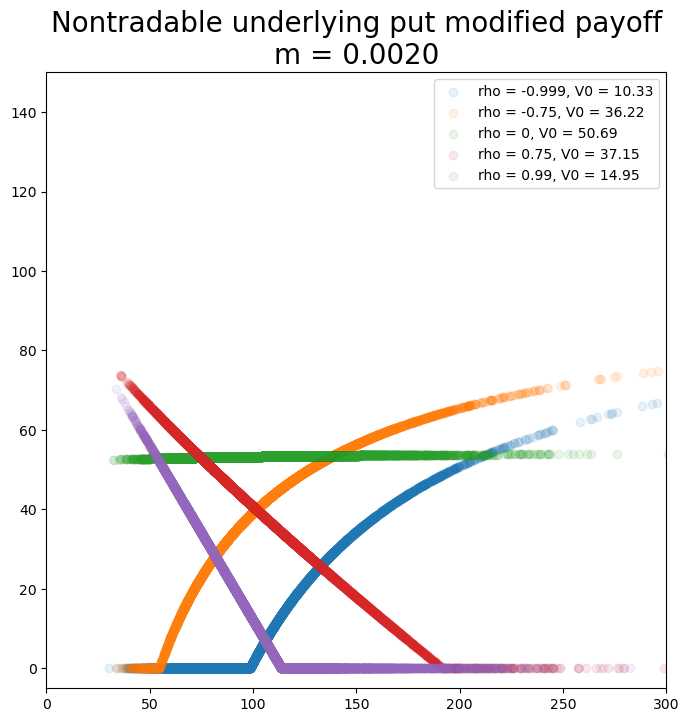

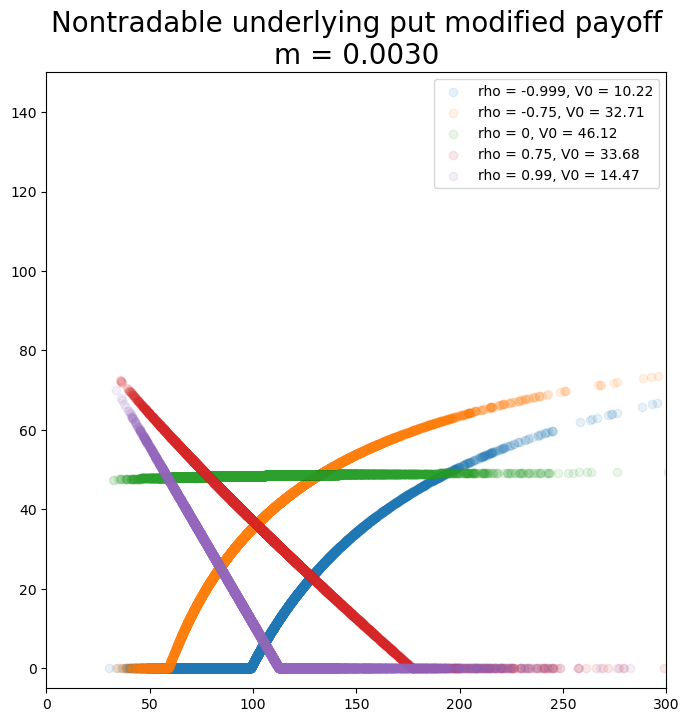

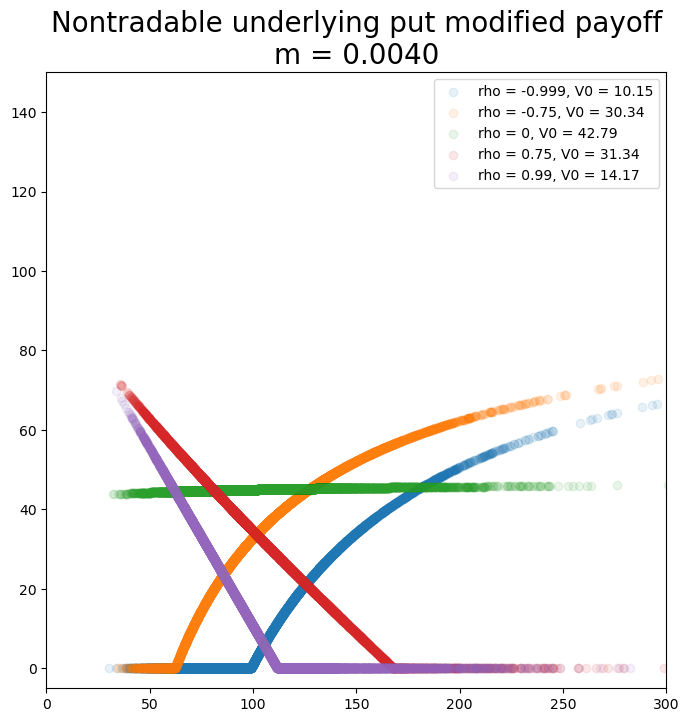

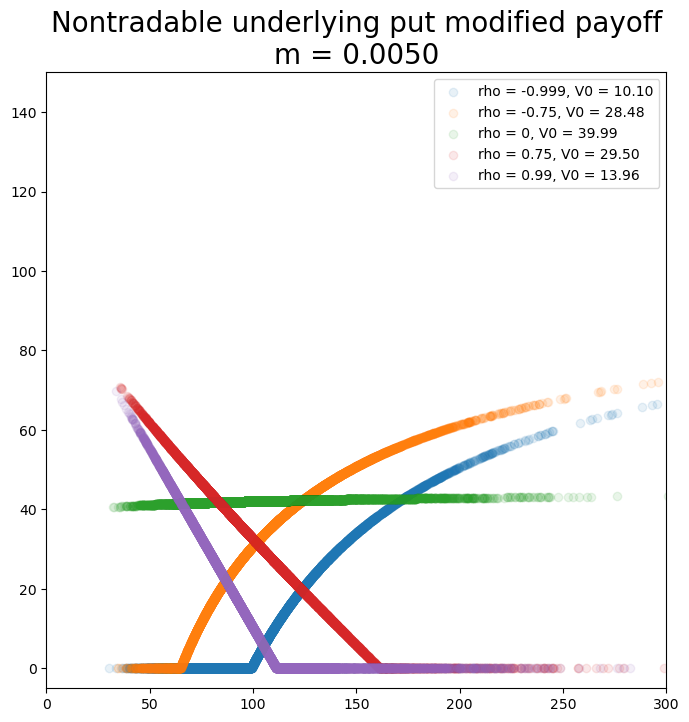

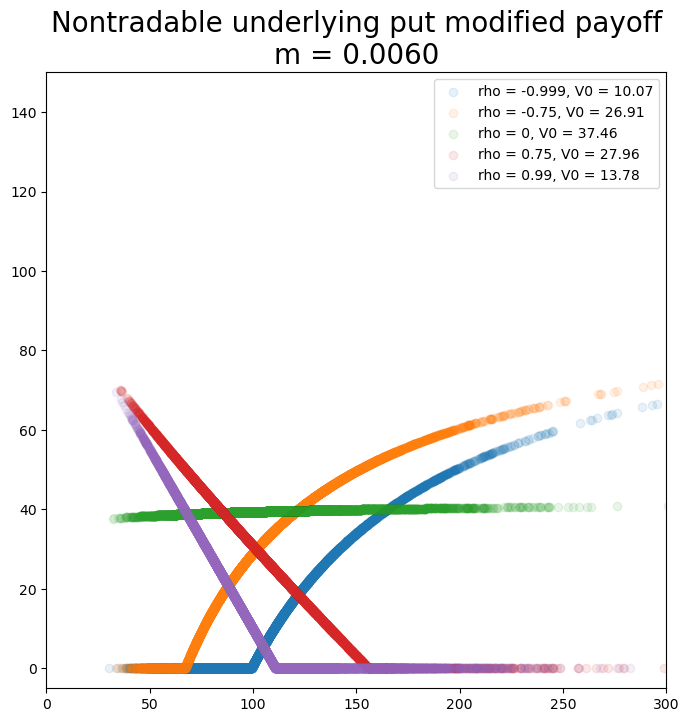

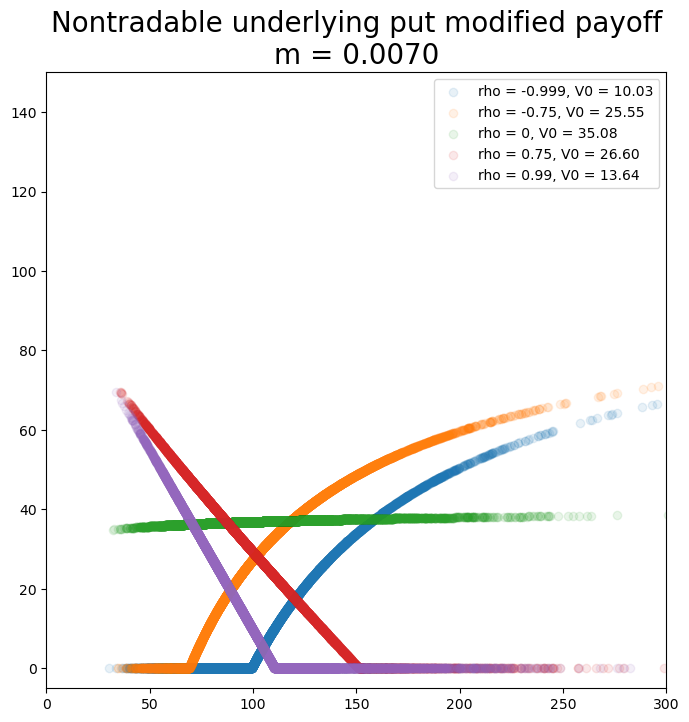

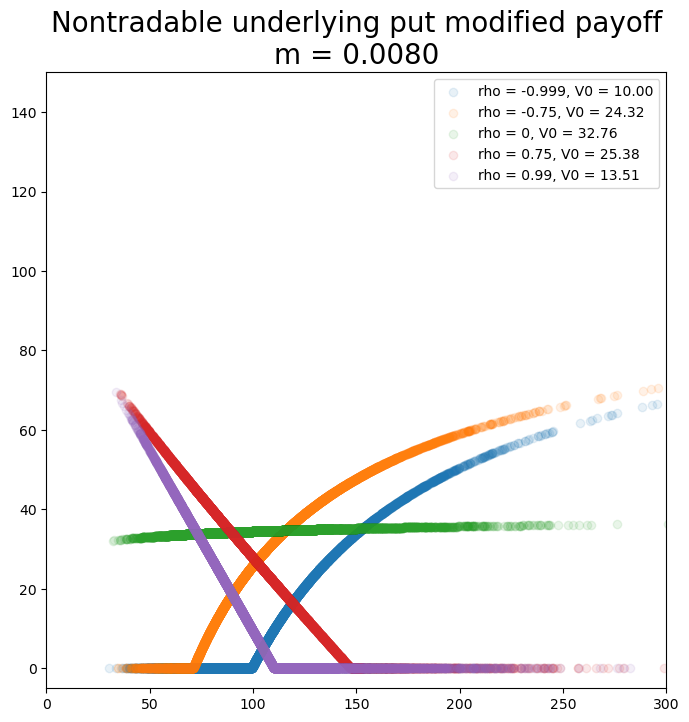

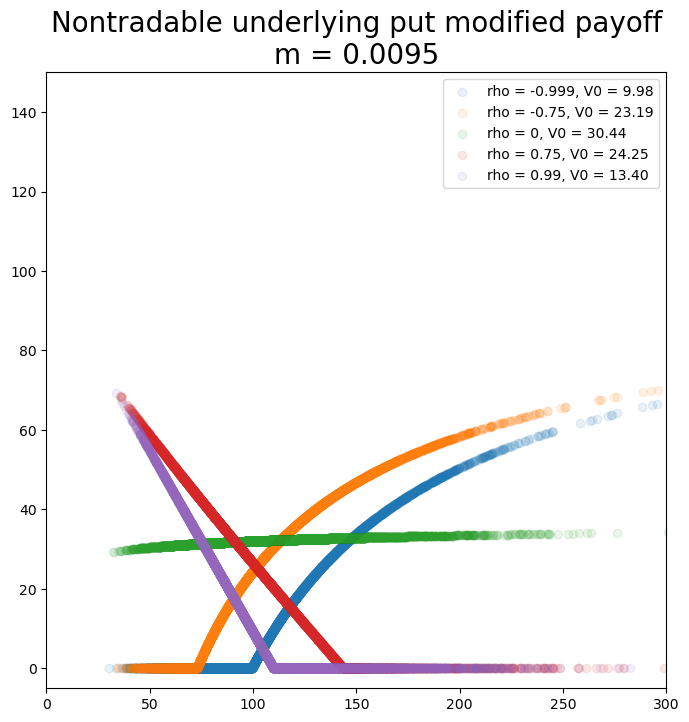

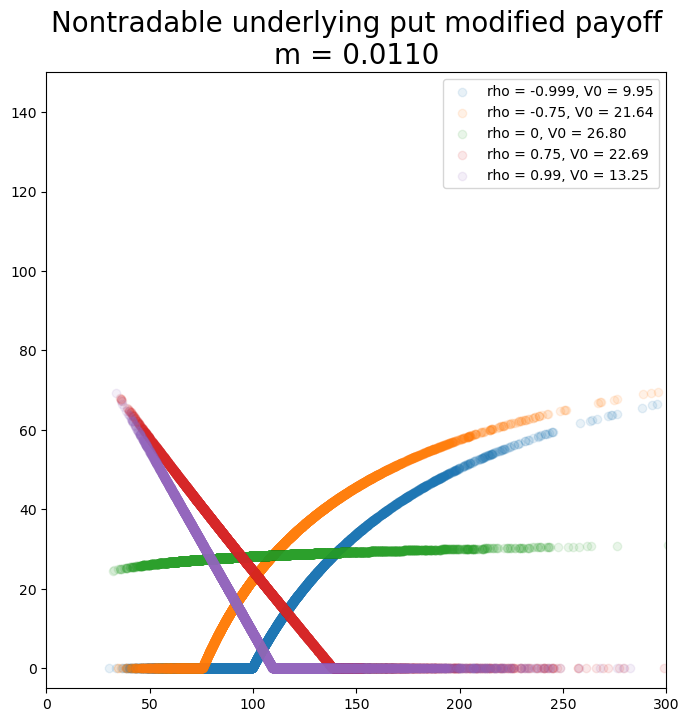

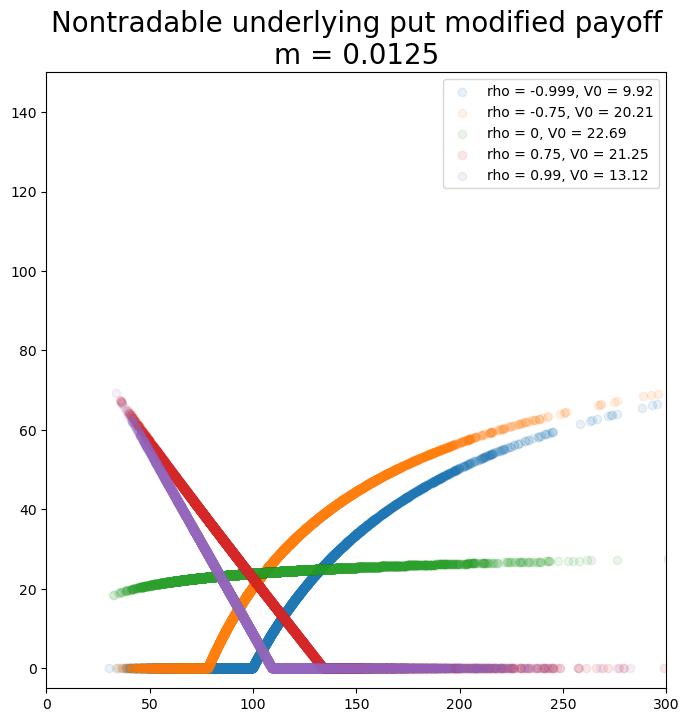

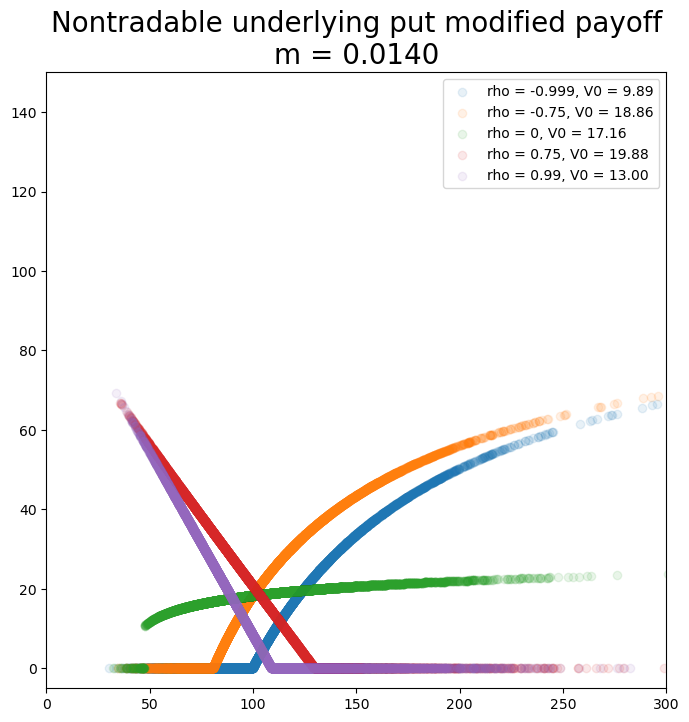

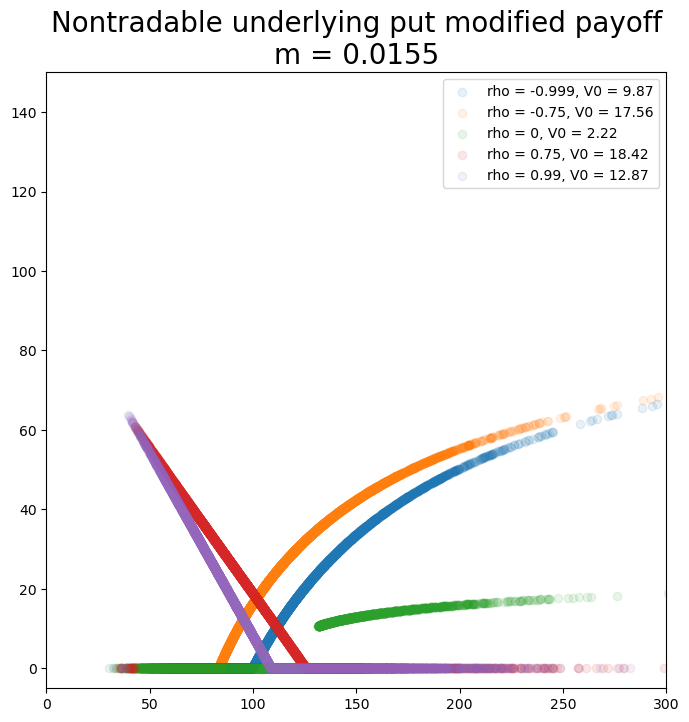

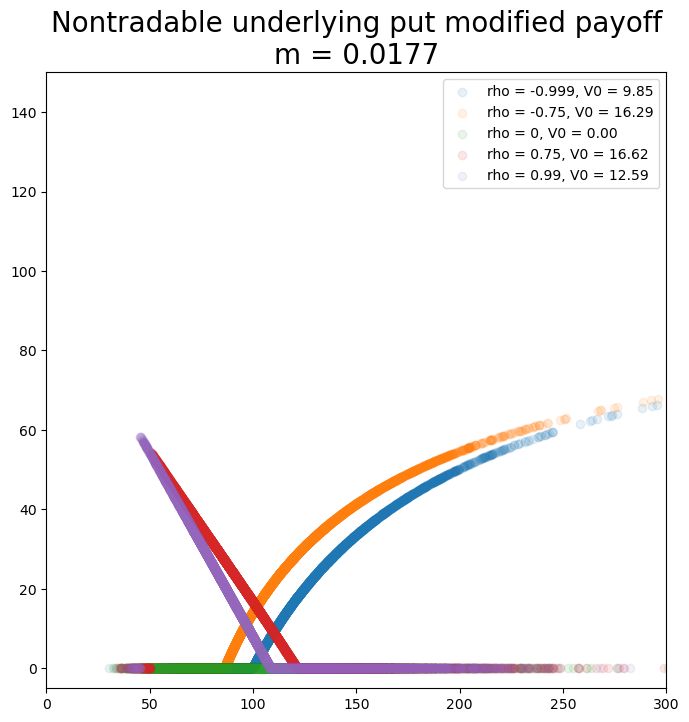

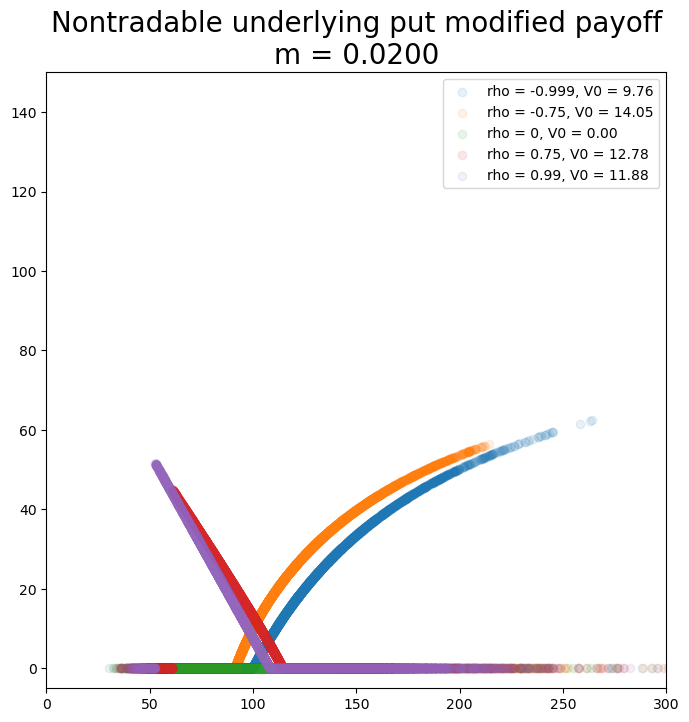

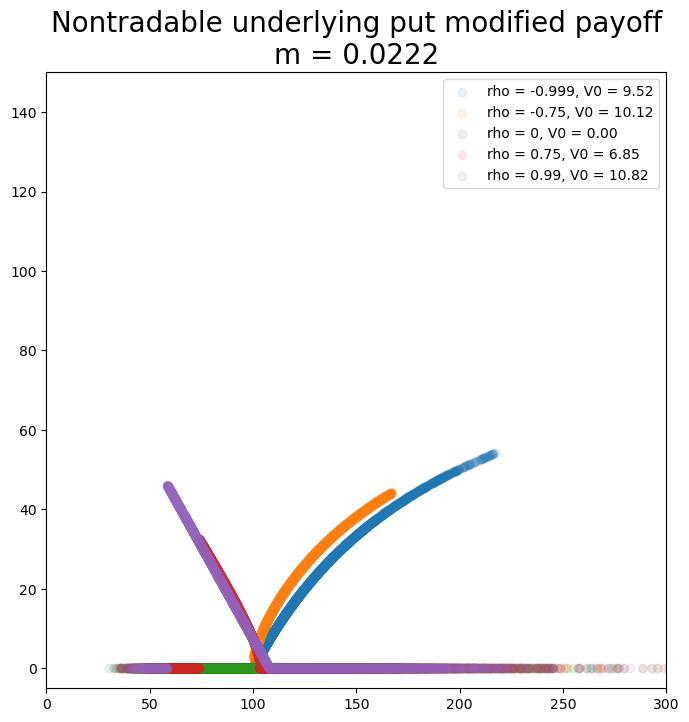

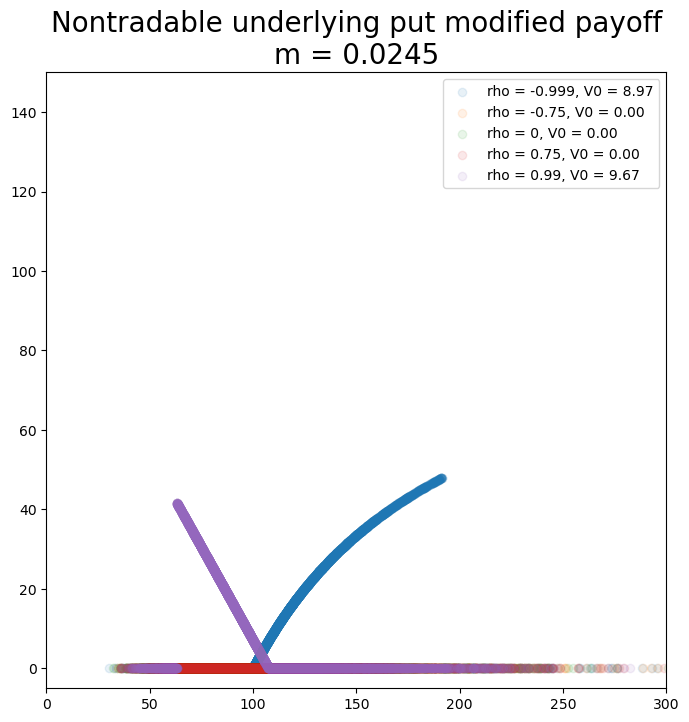

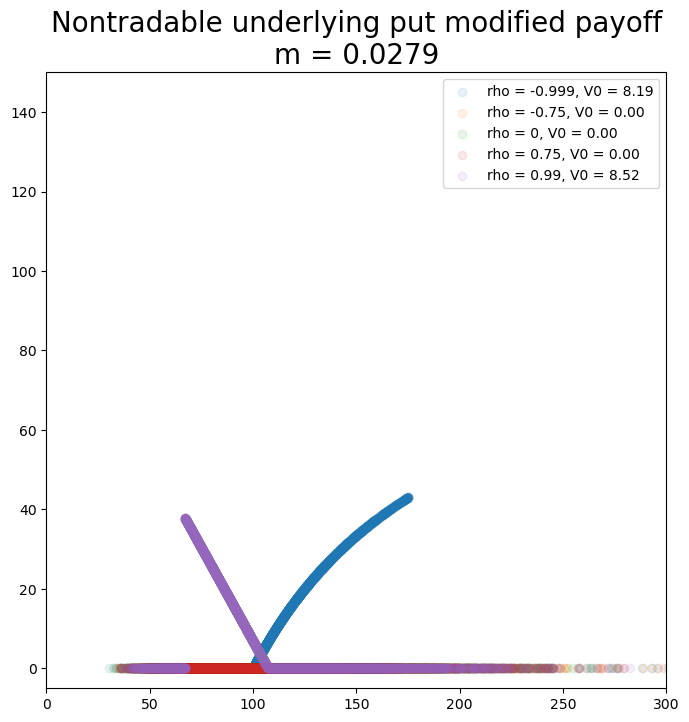

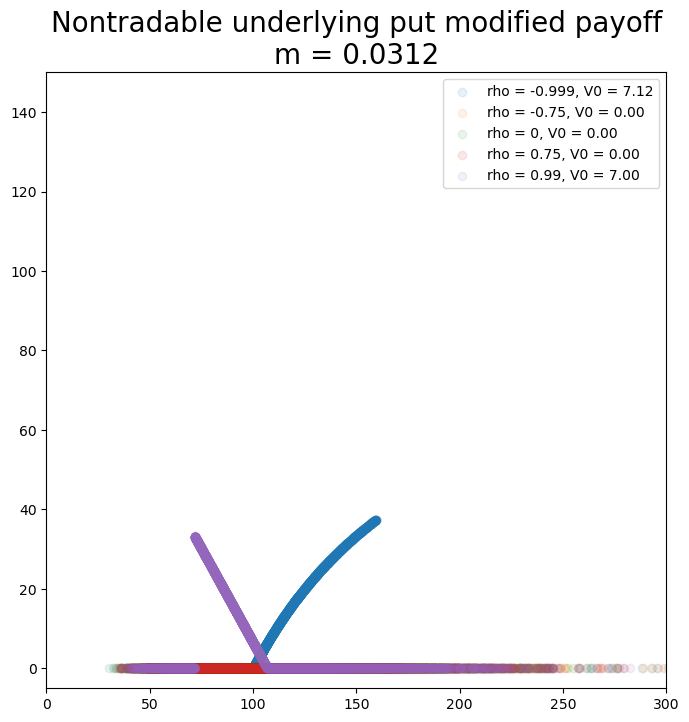

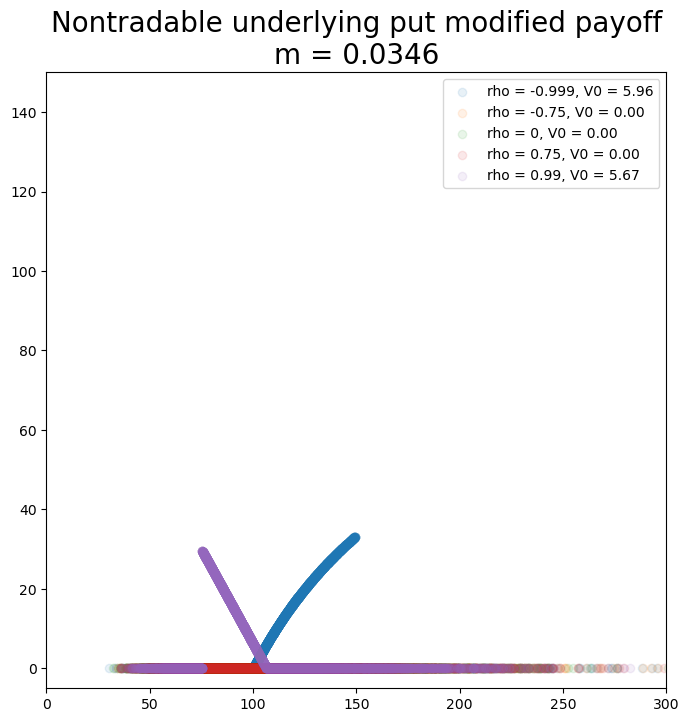

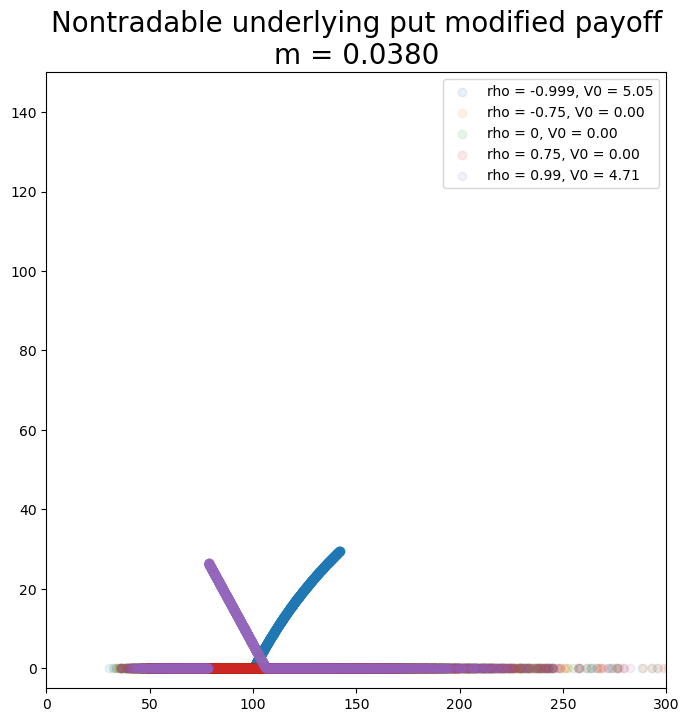

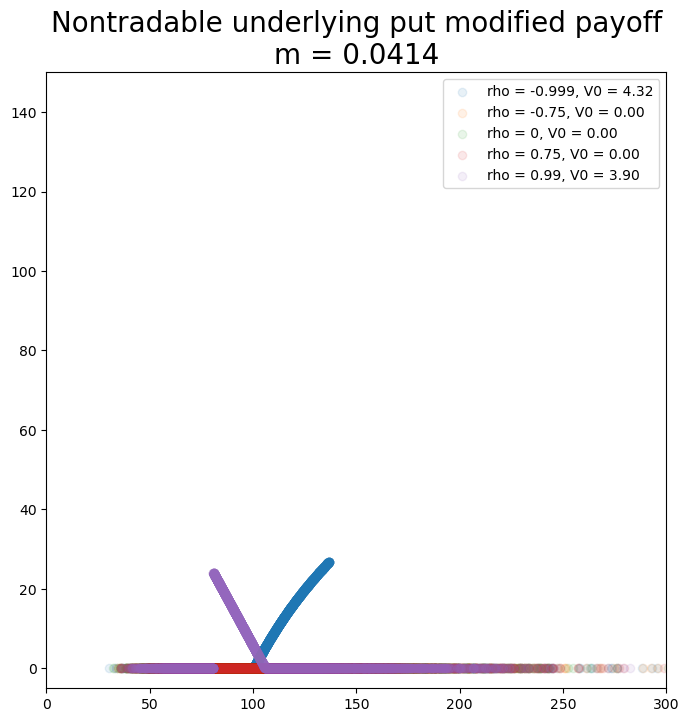

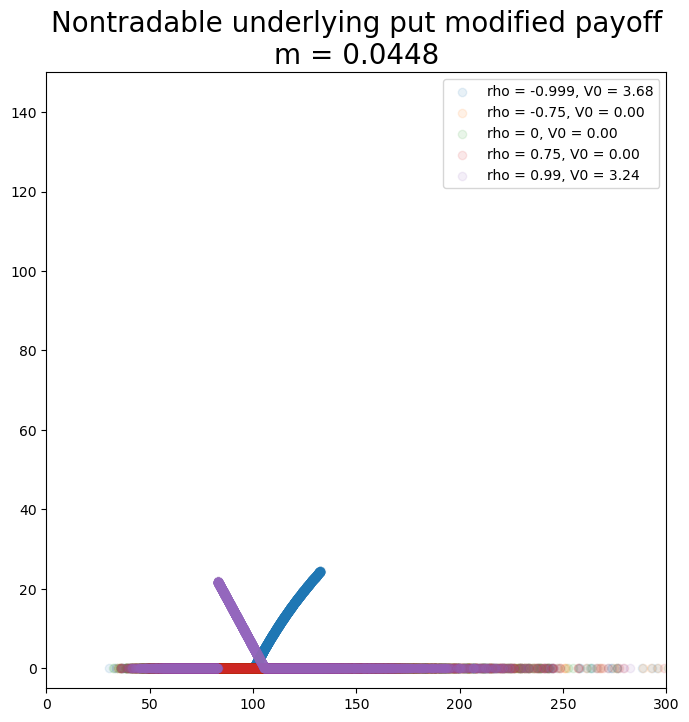

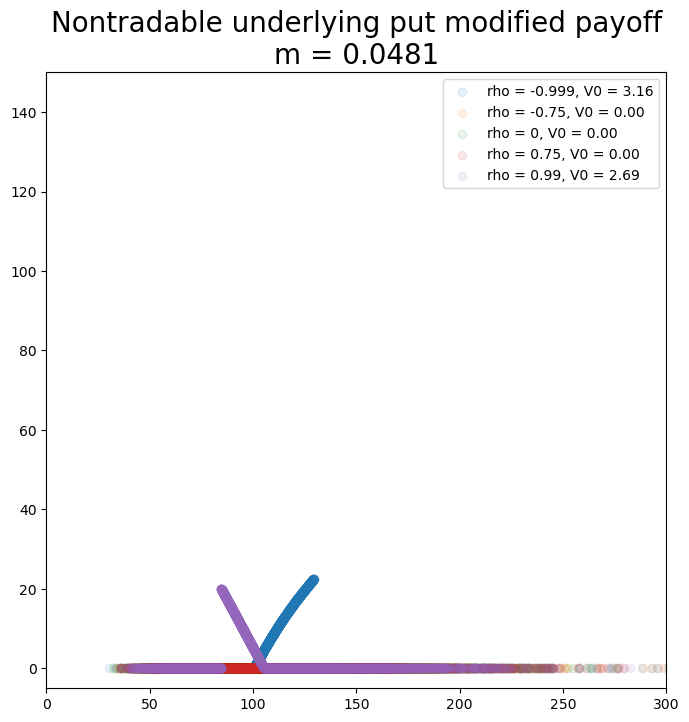

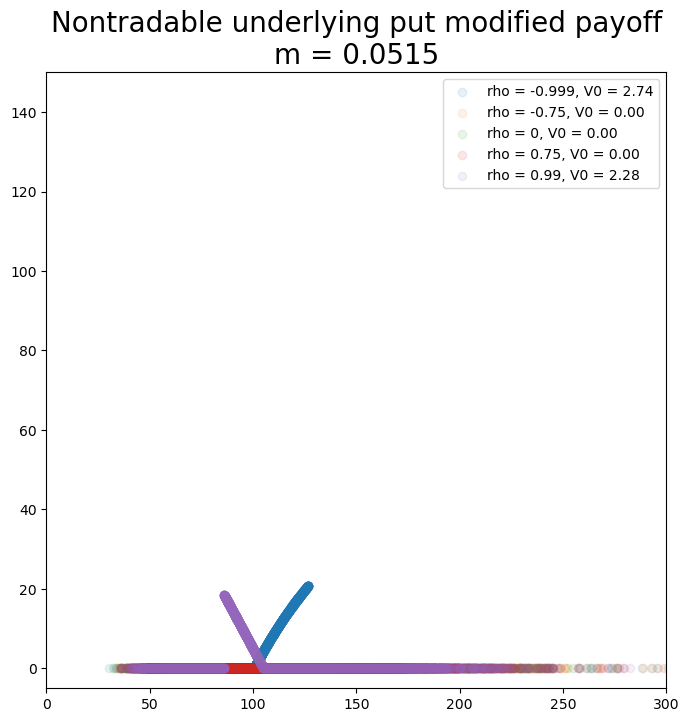

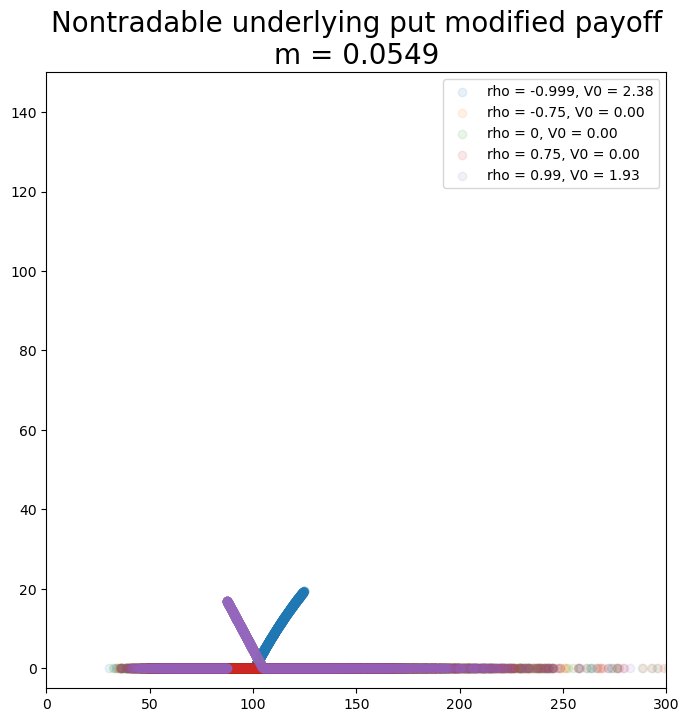

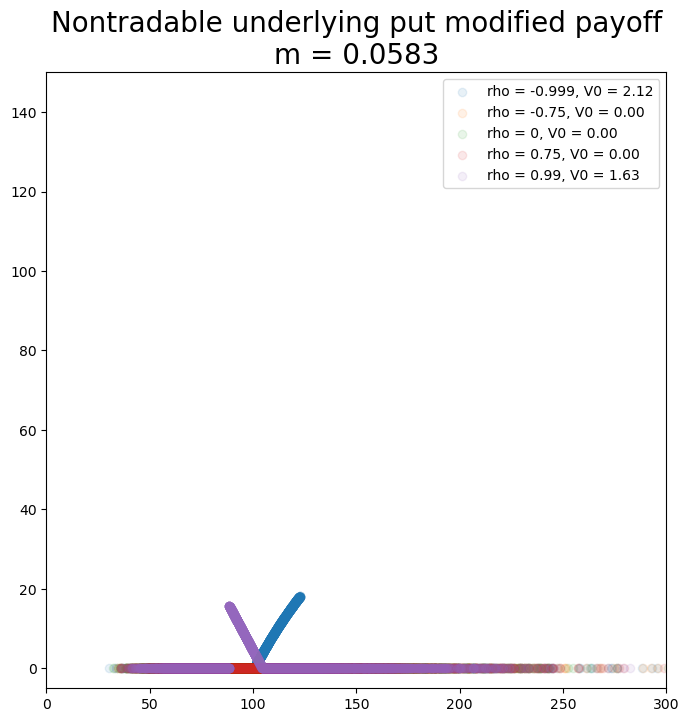

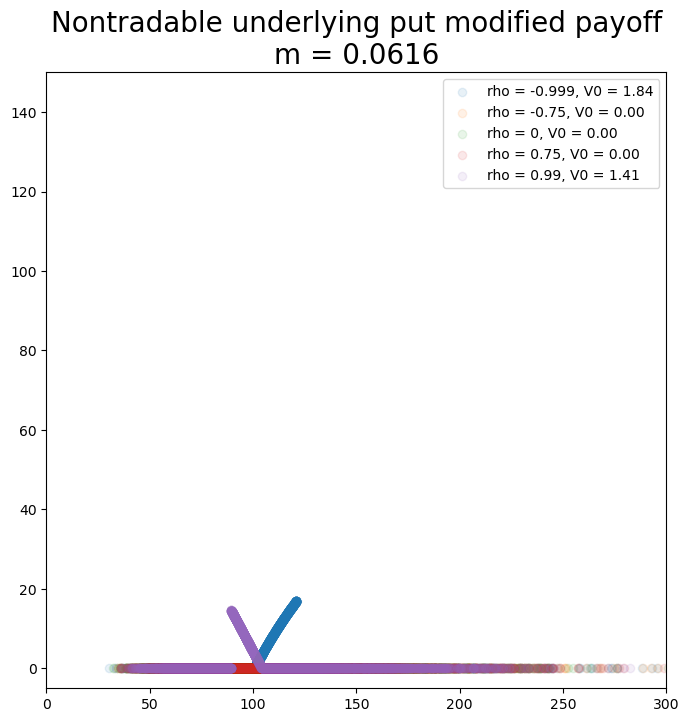

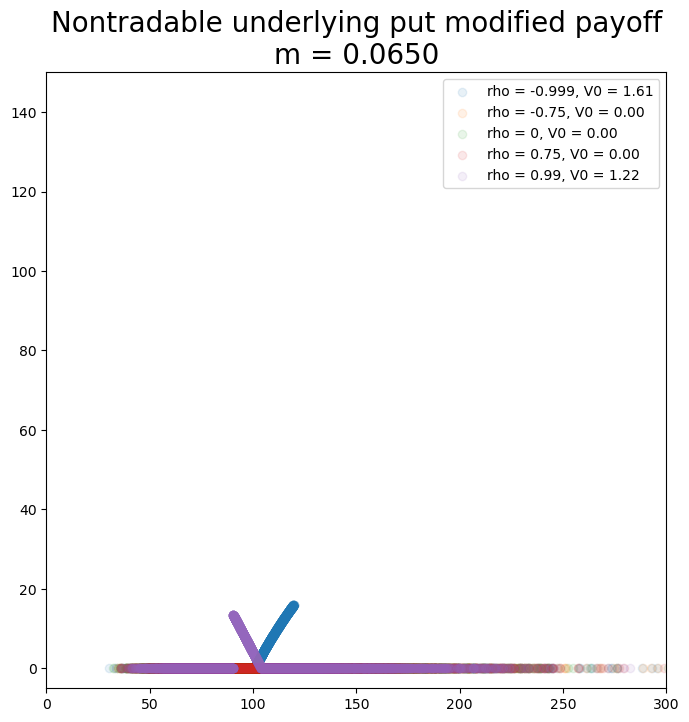

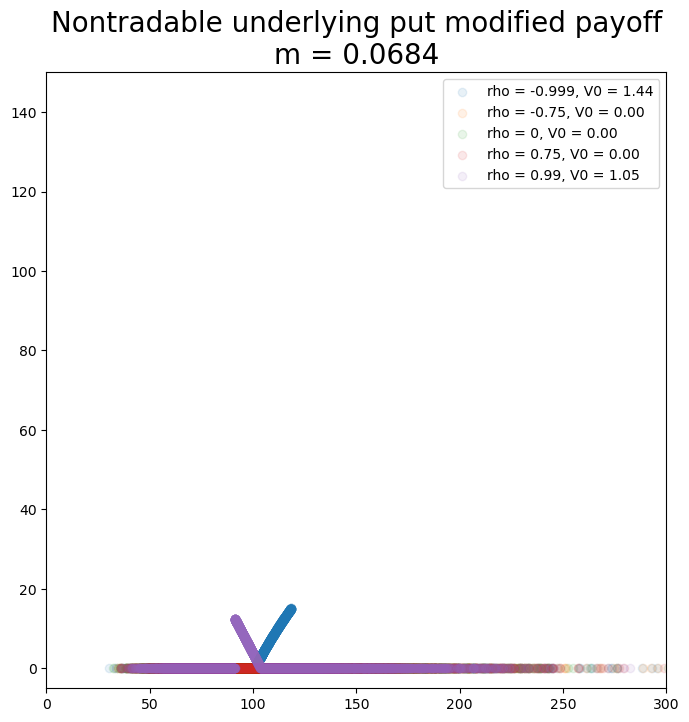

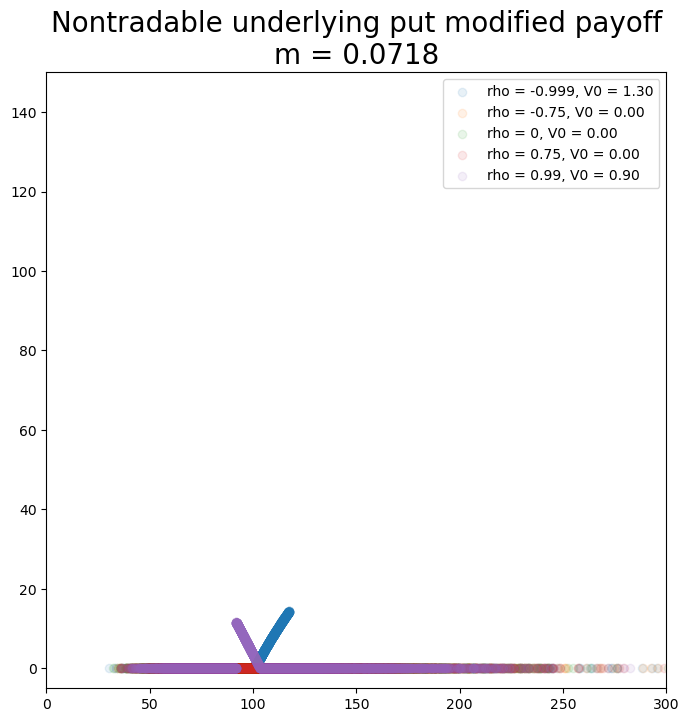

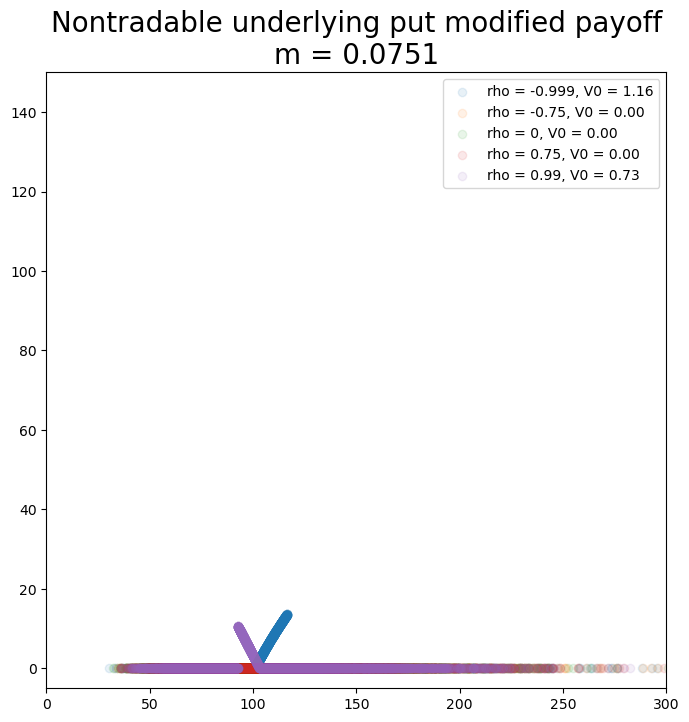

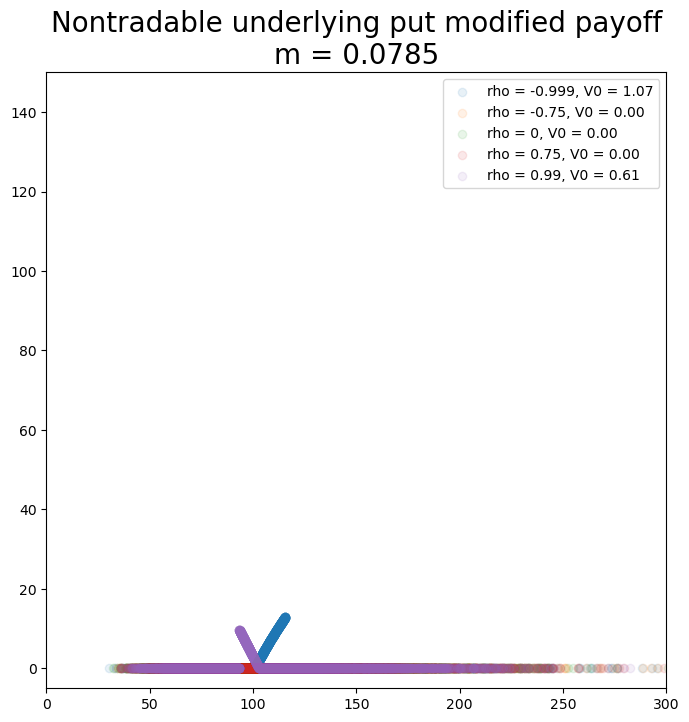

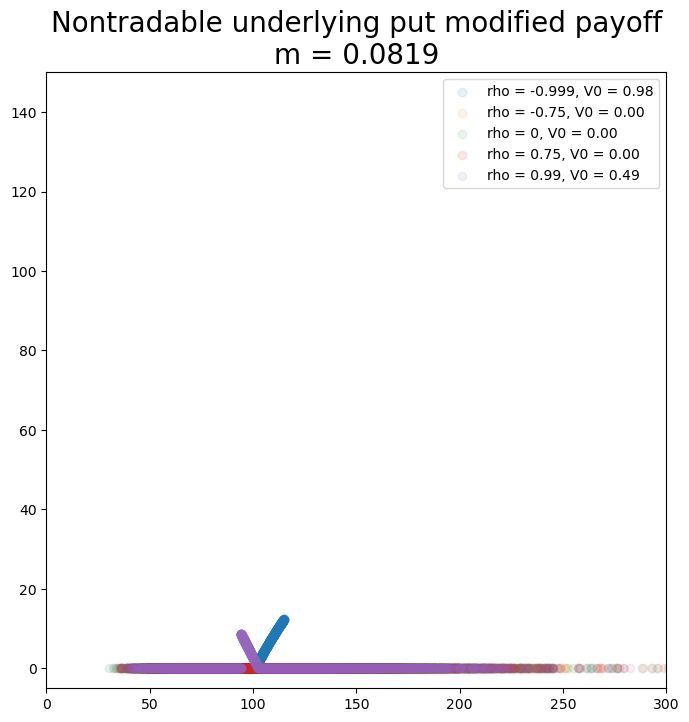

In [100]:
m = 0.001
diff = 0.001
rate = 1.5
V0_prev = 5 * [np.infty]
i = 0
while True:
    plt.figure(figsize=(8,8))
    for num, rho in enumerate(rho_put):
        option = rho_put[rho]
        final_index = round(option.underlying.values_per_year * option.T + 1)
        _, sims_full_t = option.MC_setup[0]
        sims_t = sims_full_t.iloc[:repeat,:final_index]
        option.m = m
        payoff = option.payoff_special(X0_t * sims_t, X0_nt)
        V0 = np.exp(-option.underlying.r * option.T) * payoff.mean()
        if abs(V0 - V0_prev[num]) < 0.1:
            i += 1
        V0_prev[num] = V0
        plt.scatter((X0_t * sims_t).iloc[:,-1], payoff, label = f'rho = {rho}, V0 = {V0:.2f}', alpha = 0.1)
    m += diff
    if i == 5:
        i = 0
        diff *= rate
    plt.title(f'Nontradable underlying put modified payoff\nm = {m:.4f}', size = 20)
    plt.xlim([0,300])
    plt.ylim([-5,150])
    plt.legend()
    display.clear_output(wait = True)
    display.display(plt.gcf())
    sleep(0.25)
    if np.max(np.array(V0_prev)) < 1:
        break

In [11]:
rho = 0.9999999999
underlying_nt = NonTradedUnderlying(mu_t, sigma_t, underlying_t, rho)

In [12]:
repeat = 1000

In [13]:
[_, reality_t], [_, reality_nt] = underlying_nt.simulate_together_P(repeat, T)

In [14]:
call_nt = Vanilla_on_NonTraded(underlying_nt, K, T, True)
put_nt = Vanilla_on_NonTraded(underlying_nt, K, T, False)

In [15]:
V0 = call_nt.get_MC_price(X0_t, X0_nt)

In [16]:
V0

14.122206482684401

In [17]:
old_diff = np.infty
step = 0.00001
for m in np.arange(0.00001, 1, step):
    call_nt.m = m
    price = call_nt.get_MC_price(X0_t, X0_nt)
    diff = abs(price - V0)
    if diff > old_diff:
        break
    old_diff = diff
call_nt.m = m - step

In [18]:
money_time_call = pd.DataFrame(np.zeros(reality_t.shape))
delta_time_call = pd.DataFrame(np.zeros(reality_t.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, _ = trader.simulate_hedging(call_nt, [(X0_t*reality_t).iloc[[i],:], (X0_nt*reality_nt).iloc[[i],:]], update_freq = 1, mode = 'quantile_nontraded')
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta

100%|███████████████████████████████████████| 1000/1000 [37:17<00:00,  2.24s/it]


(0.0, 250.0)

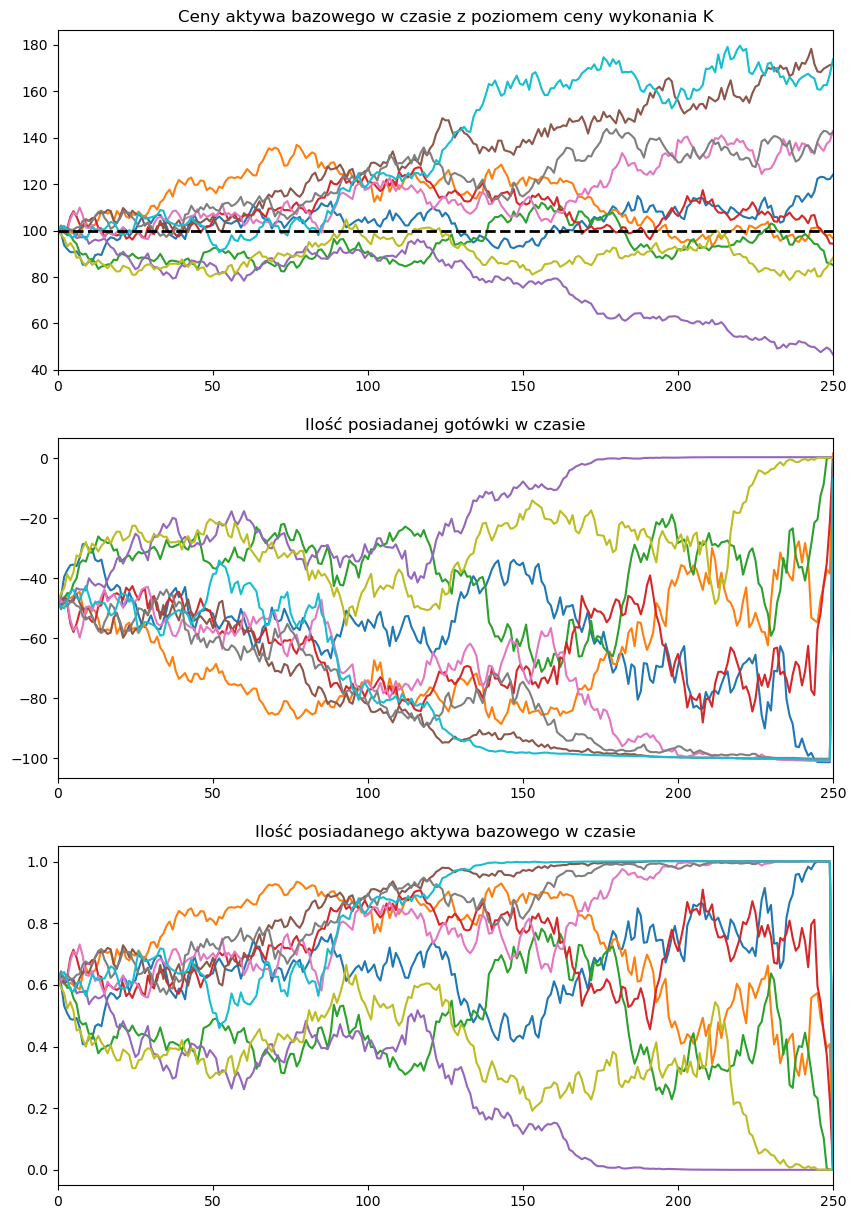

In [19]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0_nt*reality_nt.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

[(-13.863552170676385, 13.579453043556668),
 Text(0.5, 1.0, 'Dopasowany do V0 hedging kwantylowy\n mean = -0.128, std = 1.951')]

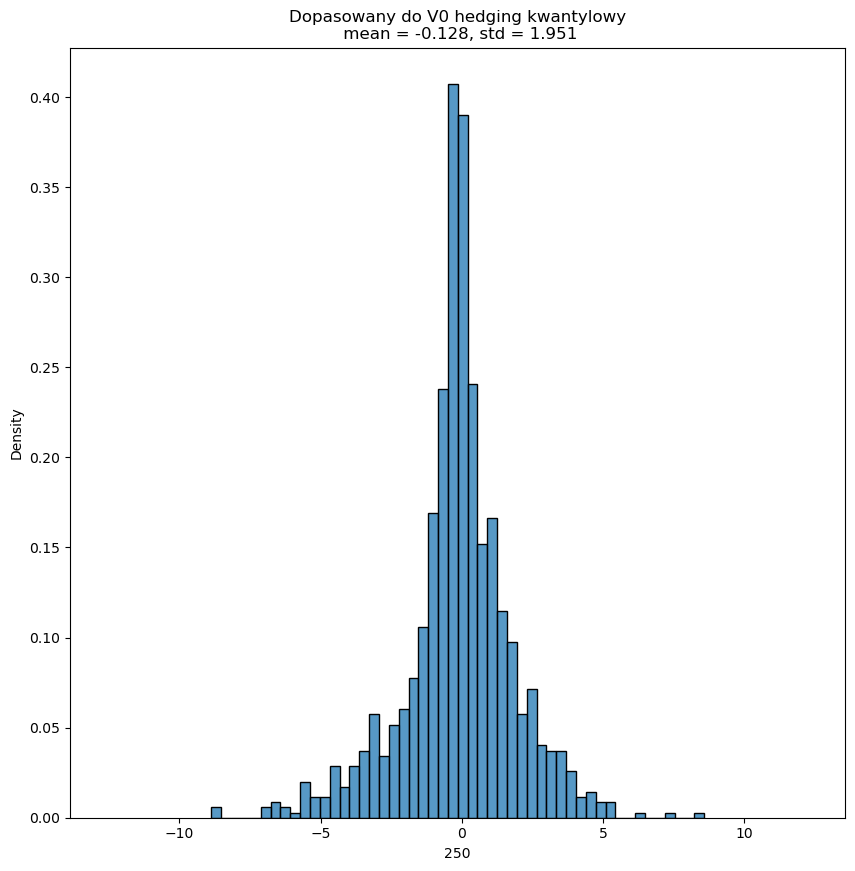

In [20]:
plt.figure(figsize = (10,10))
sb.histplot(money_time_call.iloc[:,-1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_call.iloc[:,-1]) - 5, np.max(money_time_call.iloc[:,-1]) + 5], title = f'Dopasowany do V0 hedging kwantylowy\n mean = {money_time_call.iloc[:,-1].mean():.3f}, std = {money_time_call.iloc[:,-1].std():.3f}')

In [22]:
V0 = put_nt.get_MC_price(X0_t, X0_nt)

In [23]:
V0

9.38244110448052

In [24]:
old_diff = np.infty
step = 0.00001
for m in np.arange(0.00001, 1, step):
    put_nt.m = m
    price = put_nt.get_MC_price(X0_t, X0_nt)
    diff = abs(price - V0)
    if diff > old_diff:
        break
    old_diff = diff
put_nt.m = m - step

In [25]:
money_time_put = pd.DataFrame(np.zeros(reality_t.shape))
delta_time_put = pd.DataFrame(np.zeros(reality_t.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, _ = trader.simulate_hedging(put_nt, [(X0_t*reality_t).iloc[[i],:], (X0_nt*reality_nt).iloc[[i],:]], update_freq = 1, mode = 'quantile_nontraded')
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta

100%|███████████████████████████████████████| 1000/1000 [36:51<00:00,  2.21s/it]


(0.0, 250.0)

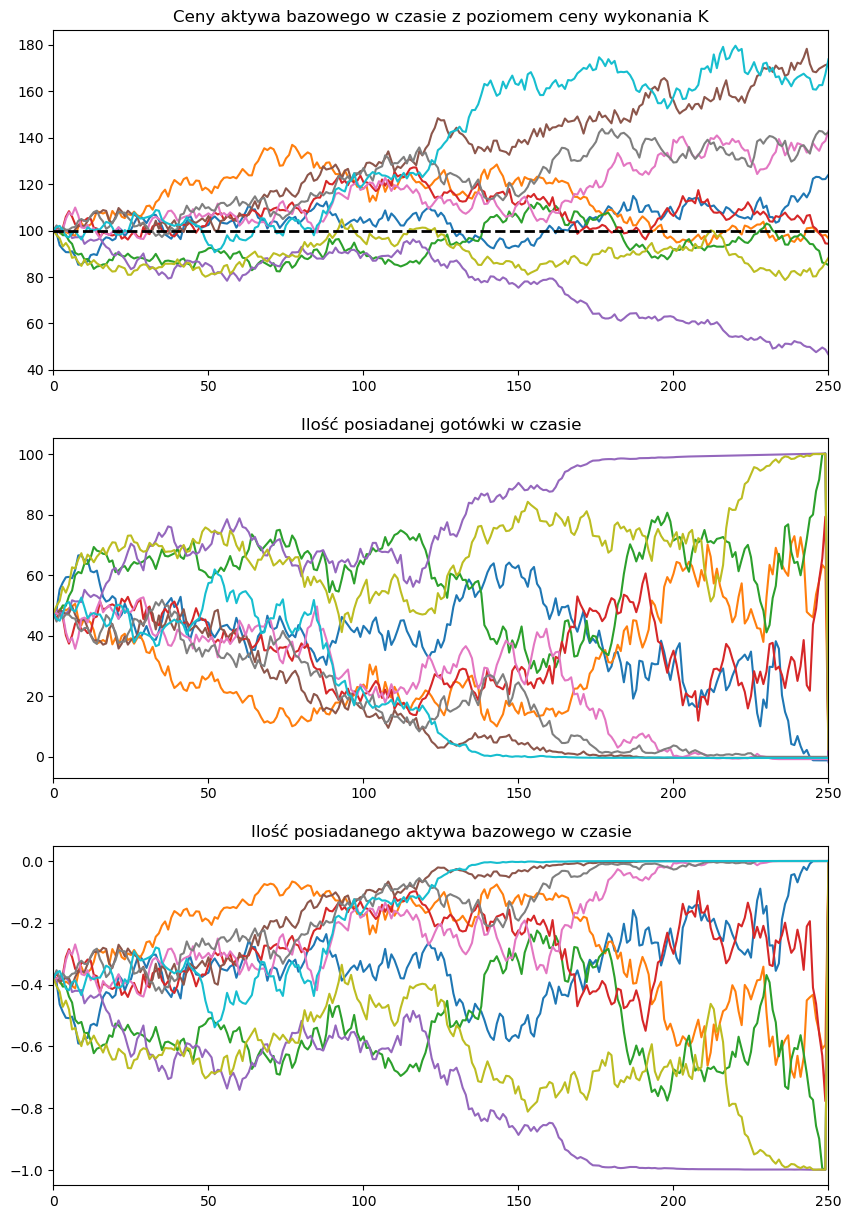

In [26]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0_nt*reality_nt.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

[(-9.662591565700268, 10.239248668954644),
 Text(0.5, 1.0, 'Dopasowany do V0 hedging kwantylowy\n mean = 0.058, std = 1.326')]

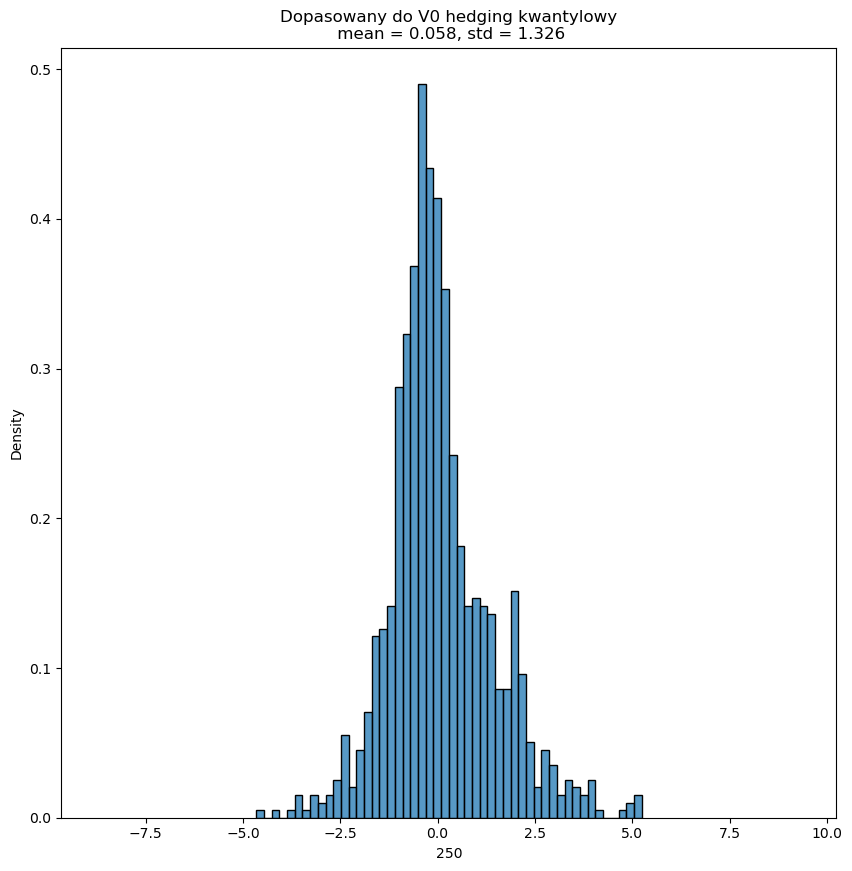

In [27]:
plt.figure(figsize = (10,10))
sb.histplot(money_time_put.iloc[:,-1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_put.iloc[:,-1]) - 5, np.max(money_time_put.iloc[:,-1]) + 5], title = f'Dopasowany do V0 hedging kwantylowy\n mean = {money_time_put.iloc[:,-1].mean():.3f}, std = {money_time_put.iloc[:,-1].std():.3f}')

In [29]:
rho = 0.9999999999
underlying_nt = NonTradedUnderlying(mu_t, sigma_t, underlying_t, rho)

In [30]:
repeat = 1000

In [31]:
[_, reality_t], [_, reality_nt] = underlying_nt.simulate_together_P(repeat, T)

In [32]:
call_nt = Vanilla_on_NonTraded(underlying_nt, K, T, True)
put_nt = Vanilla_on_NonTraded(underlying_nt, K, T, False)

In [33]:
V0 = call_nt.get_MC_price(X0_t, X0_nt)/2

In [34]:
V0

7.166623867203636

In [35]:
old_diff = np.infty
step = 0.00001
for m in np.arange(0.00001, 1, step):
    call_nt.m = m
    price = call_nt.get_MC_price(X0_t, X0_nt)
    diff = abs(price - V0)
    if diff > old_diff:
        break
    old_diff = diff
call_nt.m = m - step

In [36]:
money_time_call = pd.DataFrame(np.zeros(reality_t.shape))
delta_time_call = pd.DataFrame(np.zeros(reality_t.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, _ = trader.simulate_hedging(call_nt, [(X0_t*reality_t).iloc[[i],:], (X0_nt*reality_nt).iloc[[i],:]], update_freq = 1, mode = 'quantile_nontraded')
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta

100%|███████████████████████████████████████| 1000/1000 [36:30<00:00,  2.19s/it]


(0.0, 250.0)

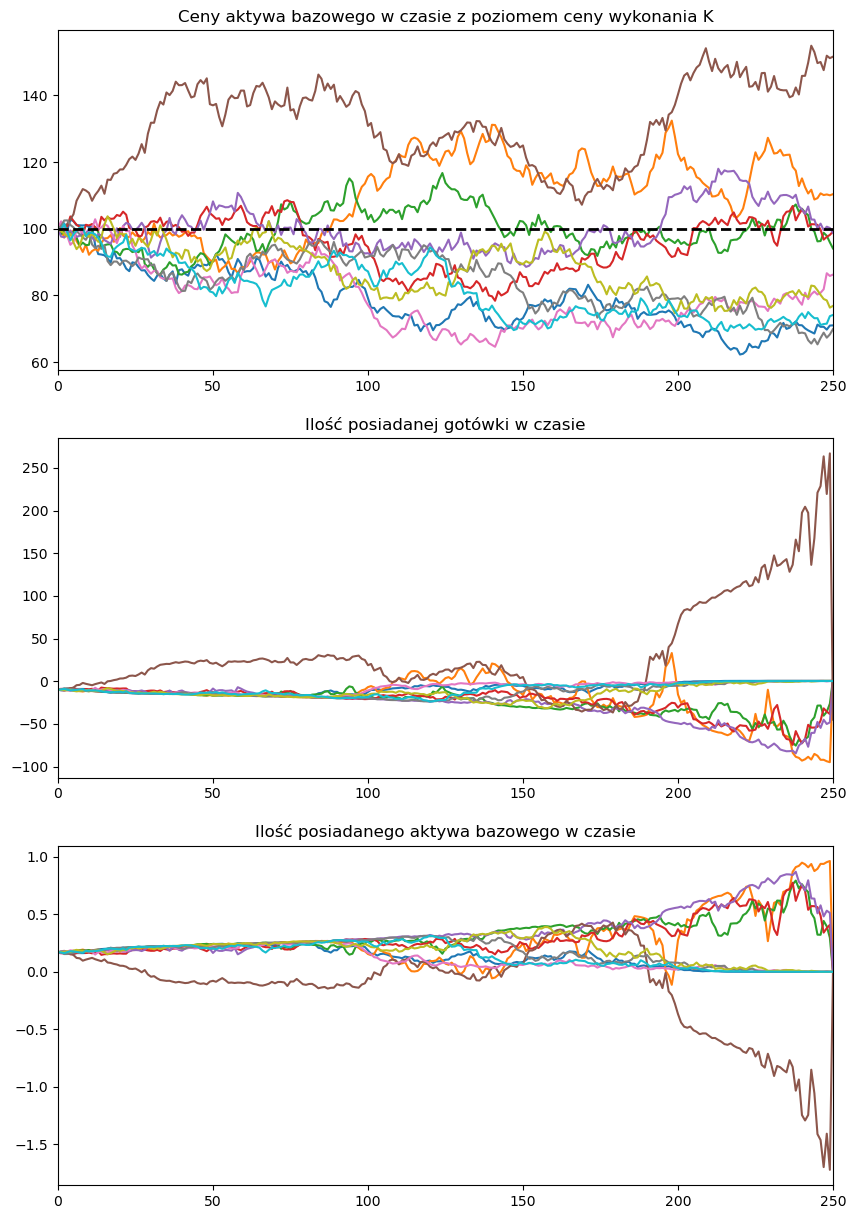

In [37]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0_nt*reality_nt.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

[(-155.94781484410257, 12.07297026385524),
 Text(0.5, 1.0, 'Dopasowany do V0 hedging kwantylowy\n mean = -8.182, std = 24.299')]

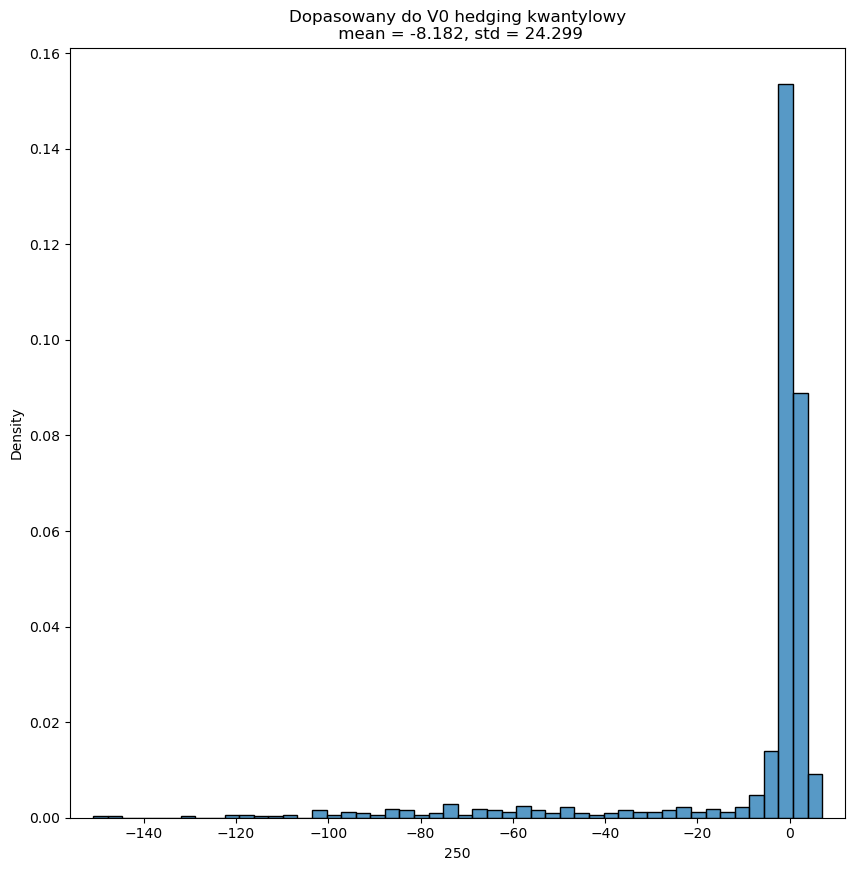

In [38]:
plt.figure(figsize = (10,10))
sb.histplot(money_time_call.iloc[:,-1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_call.iloc[:,-1]) - 5, np.max(money_time_call.iloc[:,-1]) + 5], title = f'Dopasowany do V0 hedging kwantylowy\n mean = {money_time_call.iloc[:,-1].mean():.3f}, std = {money_time_call.iloc[:,-1].std():.3f}')

Text(0.5, 1.0, 'Ostateczny stan portfela- wszystkie symulacje')

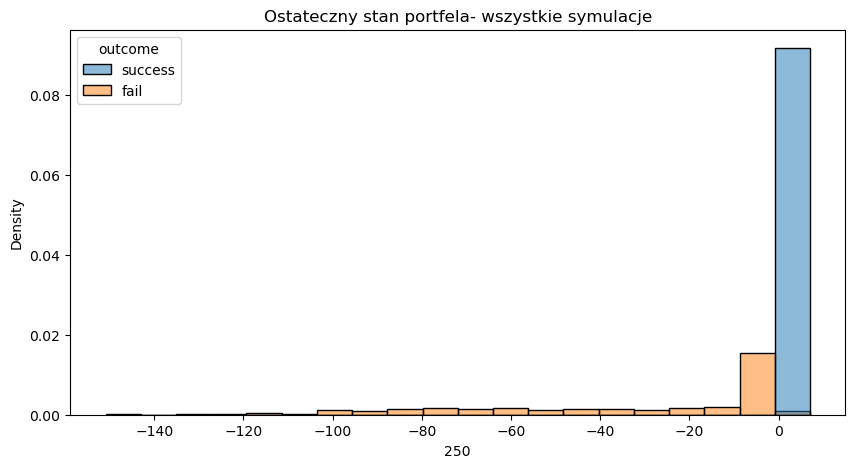

In [39]:
money_time_call_outcome = money_time_call.copy()
money_time_call_outcome['outcome'] = money_time_call.apply(lambda row: 'success' if row.iloc[-1] >= - 0.1 * V0 else 'fail', axis = 1)
plt.figure(figsize = (10, 5))
sb.histplot(x = money_time_call_outcome[underlying_nt.values_per_year * T], bins = 20, hue = money_time_call_outcome['outcome'], legend = True, stat = 'density').set_title(f'Ostateczny stan portfela- wszystkie symulacje')

In [40]:
V0 = put_nt.get_MC_price(X0_t, X0_nt)/2

In [41]:
V0

4.671995552769488

In [42]:
old_diff = np.infty
step = 0.00001
for m in np.arange(0.00001, 1, step):
    put_nt.m = m
    price = put_nt.get_MC_price(X0_t, X0_nt)
    diff = abs(price - V0)
    if diff > old_diff:
        break
    old_diff = diff
put_nt.m = m - step

In [43]:
money_time_put = pd.DataFrame(np.zeros(reality_t.shape))
delta_time_put = pd.DataFrame(np.zeros(reality_t.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, _ = trader.simulate_hedging(put_nt, [(X0_t*reality_t).iloc[[i],:], (X0_nt*reality_nt).iloc[[i],:]], update_freq = 1, mode = 'quantile_nontraded')
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta

100%|█████████████████████████████████████| 1000/1000 [2:04:13<00:00,  7.45s/it]


(0.0, 250.0)

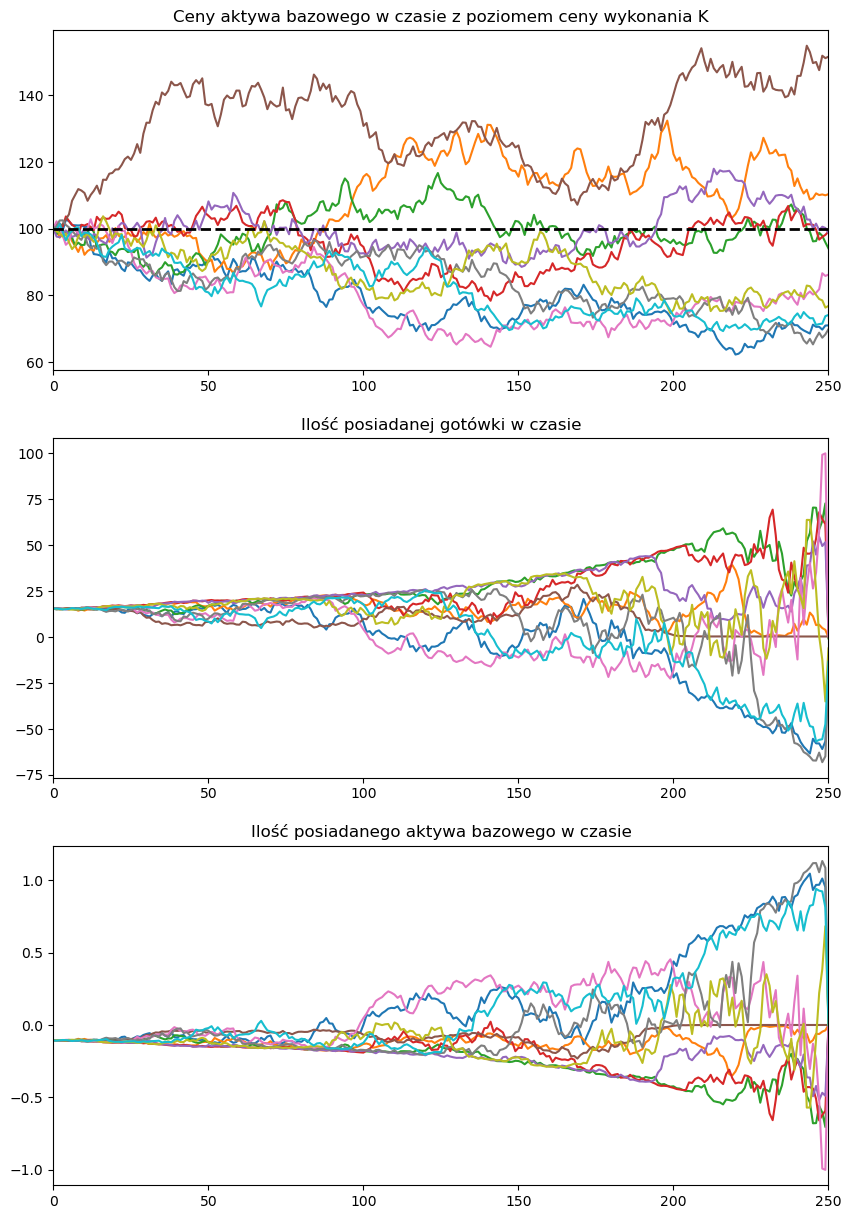

In [44]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0_nt*reality_nt.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

[(-60.18100031094576, 10.859058703329666),
 Text(0.5, 1.0, 'Dopasowany do V0 hedging kwantylowy\n mean = -4.314, std = 11.062')]

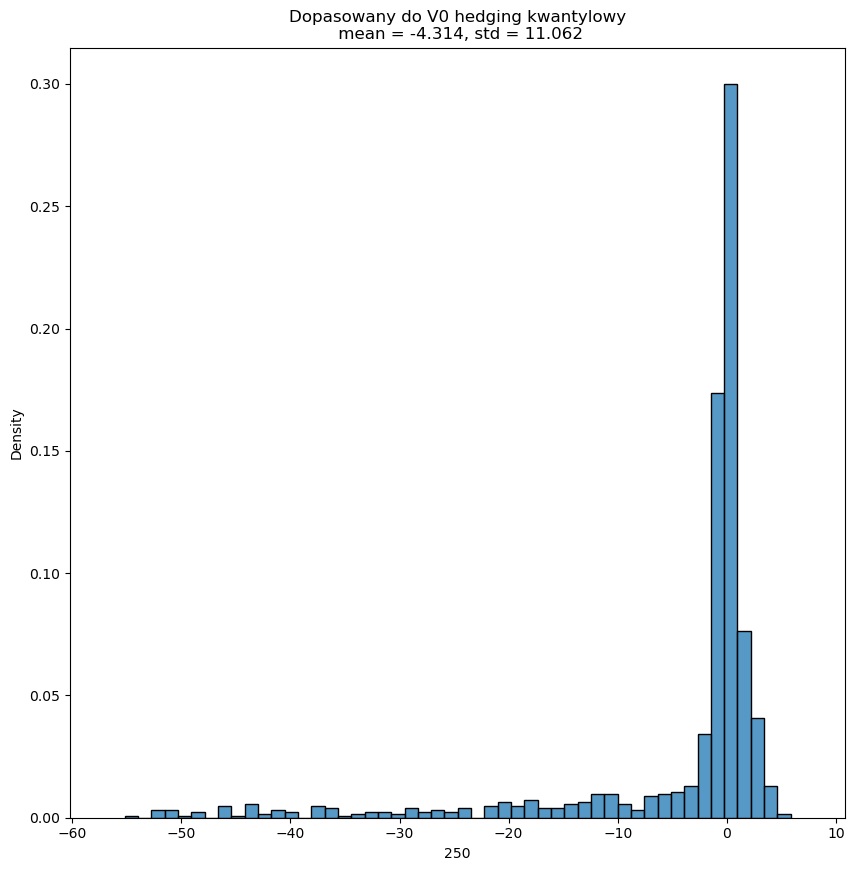

In [45]:
plt.figure(figsize = (10,10))
sb.histplot(money_time_put.iloc[:,-1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_put.iloc[:,-1]) - 5, np.max(money_time_put.iloc[:,-1]) + 5], title = f'Dopasowany do V0 hedging kwantylowy\n mean = {money_time_put.iloc[:,-1].mean():.3f}, std = {money_time_put.iloc[:,-1].std():.3f}')

Text(0.5, 1.0, 'Ostateczny stan portfela- wszystkie symulacje')

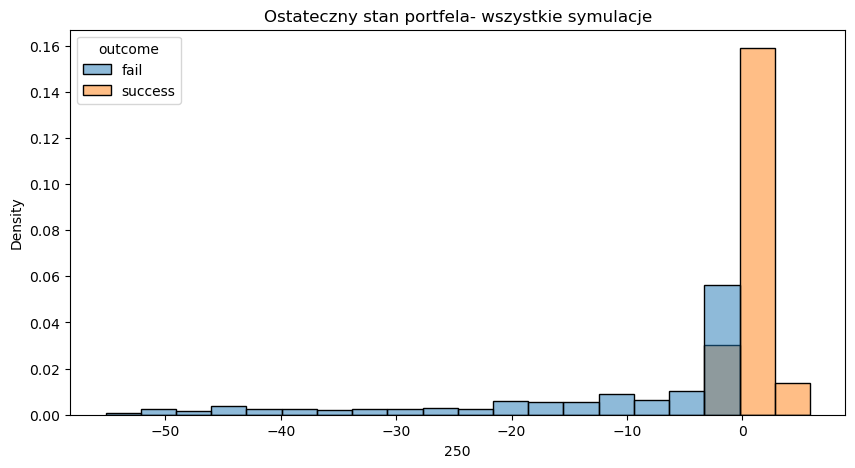

In [46]:
money_time_put_outcome = money_time_put.copy()
money_time_put_outcome['outcome'] = money_time_put.apply(lambda row: 'success' if row.iloc[-1] >= - 0.1 * V0 else 'fail', axis = 1)
plt.figure(figsize = (10, 5))
sb.histplot(x = money_time_put_outcome[underlying_nt.values_per_year * T], bins = 20, hue = money_time_put_outcome['outcome'], legend = True, stat = 'density').set_title(f'Ostateczny stan portfela- wszystkie symulacje')

In [9]:
rho = 0.5
underlying_nt = NonTradedUnderlying(mu_t, sigma_t, underlying_t, rho)

In [10]:
repeat = 1000

In [11]:
[_, reality_t], [_, reality_nt] = underlying_nt.simulate_together_Q(repeat, T)

In [12]:
call_nt = Vanilla_on_NonTraded(underlying_nt, K, T, True)
put_nt = Vanilla_on_NonTraded(underlying_nt, K, T, False)

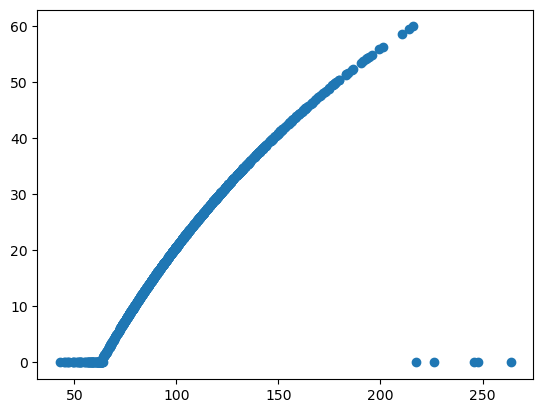

In [13]:
plt.scatter((X0_t * reality_t).iloc[:,-1], call_nt.payoff_special((X0_t * reality_t), X0_nt))

In [14]:
V0 = call_nt.get_MC_price(X0_t, X0_nt)

In [15]:
V0

20.317956394577006

In [16]:
old_diff = np.infty
step = 0.00001
for m in np.arange(0.00001, 1, step):
    call_nt.m = m
    price = call_nt.get_MC_price(X0_t, X0_nt)
    diff = abs(price - V0)
    if diff > old_diff:
        break
    old_diff = diff
call_nt.m = m - step

In [17]:
money_time_call = pd.DataFrame(np.zeros(reality_t.shape))
delta_time_call = pd.DataFrame(np.zeros(reality_t.shape))
for i in tqdm(range(10)):
    trader = Trader(initial_capital = V0)
    money, delta, _ = trader.simulate_hedging(call_nt, [(X0_t*reality_t).iloc[[i],:], (X0_nt*reality_nt).iloc[[i],:]], update_freq = 1, mode = 'quantile_nontraded')
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta

100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.22s/it]


(0.0, 250.0)

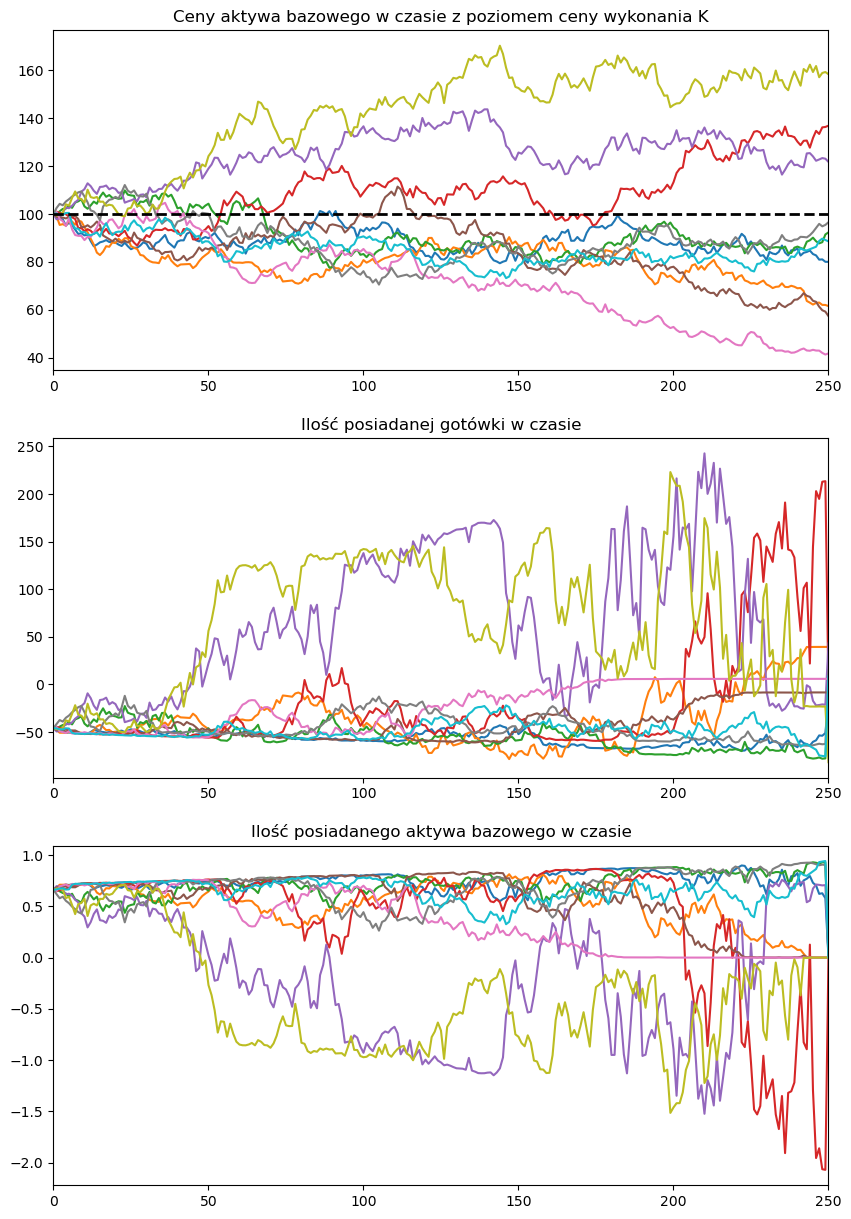

In [18]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0_nt*reality_nt.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

[(-86.63274246650803, 48.04787037993201),
 Text(0.5, 1.0, 'Dopasowany do V0 hedging kwantylowy\n mean = -0.004, std = 3.286')]

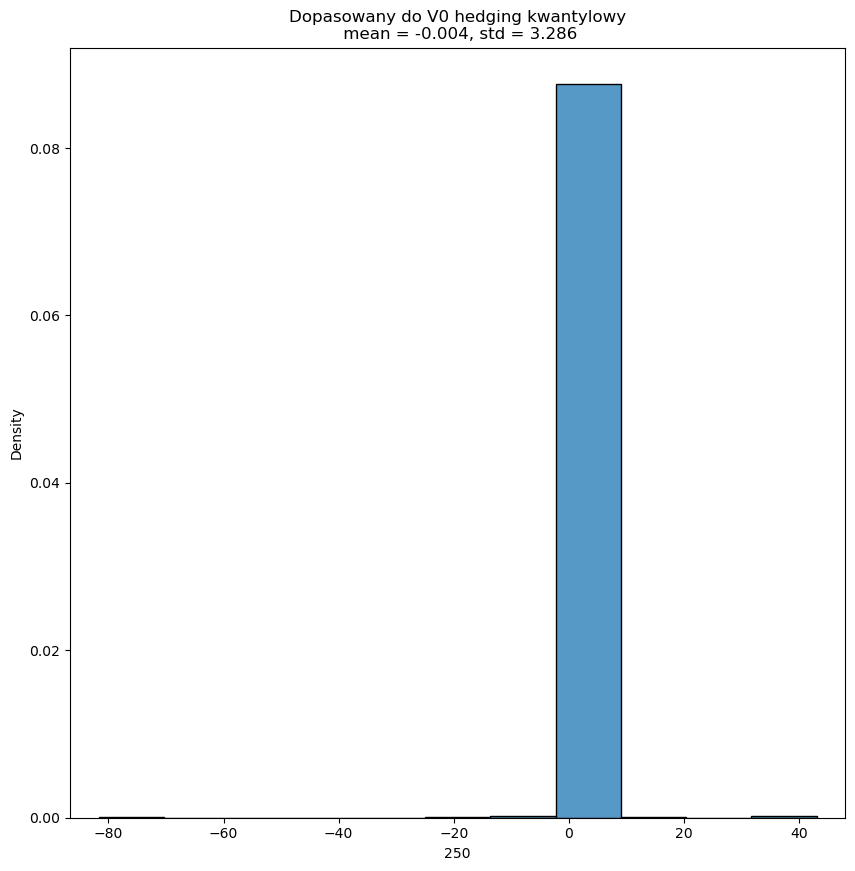

In [19]:
plt.figure(figsize = (10,10))
sb.histplot(money_time_call.iloc[:,-1], stat = 'density').set(xlim = [np.min(money_time_call.iloc[:,-1]) - 5, np.max(money_time_call.iloc[:,-1]) + 5], title = f'Dopasowany do V0 hedging kwantylowy\n mean = {money_time_call.iloc[:,-1].mean():.3f}, std = {money_time_call.iloc[:,-1].std():.3f}')

Text(0.5, 1.0, 'Ostateczny stan portfela- wszystkie symulacje')

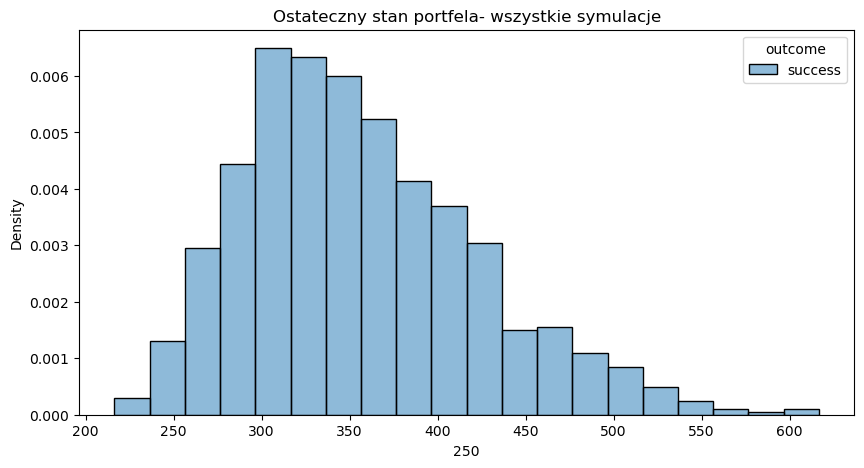

In [57]:
money_time_call_outcome = money_time_call.copy()
money_time_call_outcome['outcome'] = money_time_call.apply(lambda row: 'success' if row.iloc[-1] >= - 0.1 * V0 else 'fail', axis = 1)
plt.figure(figsize = (10, 5))
sb.histplot(x = money_time_call_outcome[underlying_nt.values_per_year * T], bins = 20, hue = money_time_call_outcome['outcome'], legend = True, stat = 'density').set_title(f'Ostateczny stan portfela- wszystkie symulacje')

In [58]:
V0 = put_nt.get_MC_price(X0_t, X0_nt)

In [59]:
V0

76.6944498952888

In [60]:
old_diff = np.infty
step = 0.00001
for m in np.arange(0.00001, 1, step):
    put_nt.m = m
    price = put_nt.get_MC_price(X0_t, X0_nt)
    diff = abs(price - V0)
    if diff > old_diff:
        break
    old_diff = diff
put_nt.m = m - step

In [ ]:
money_time_put = pd.DataFrame(np.zeros(reality_t.shape))
delta_time_put = pd.DataFrame(np.zeros(reality_t.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, _ = trader.simulate_hedging(put_nt, [(X0_t*reality_t).iloc[[i],:], (X0_nt*reality_nt).iloc[[i],:]], update_freq = 1, mode = 'quantile_nontraded')
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta

In [ ]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0_nt*reality_nt.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

In [ ]:
plt.figure(figsize = (10,10))
sb.histplot(money_time_put.iloc[:,-1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_put.iloc[:,-1]) - 5, np.max(money_time_put.iloc[:,-1]) + 5], title = f'Dopasowany do V0 hedging kwantylowy\n mean = {money_time_put.iloc[:,-1].mean():.3f}, std = {money_time_put.iloc[:,-1].std():.3f}')

In [ ]:
money_time_put_outcome = money_time_put.copy()
money_time_put_outcome['outcome'] = money_time_put.apply(lambda row: 'success' if row.iloc[-1] >= - 0.1 * V0 else 'fail', axis = 1)
plt.figure(figsize = (10, 5))
sb.histplot(x = money_time_put_outcome[underlying_nt.values_per_year * T], bins = 20, hue = money_time_put_outcome['outcome'], legend = True, stat = 'density').set_title(f'Ostateczny stan portfela- wszystkie symulacje')

In [ ]:
rho = 0.5
underlying_nt = NonTradedUnderlying(mu_t, sigma_t, underlying_t, rho)

In [ ]:
repeat = 1000

In [ ]:
[_, reality_t], [_, reality_nt] = underlying_nt.simulate_together_P(repeat, T)

In [ ]:
call_nt = Vanilla_on_NonTraded(underlying_nt, K, T, True)
put_nt = Vanilla_on_NonTraded(underlying_nt, K, T, False)

In [ ]:
V0 = call_nt.get_MC_price(X0_t, X0_nt)/2

In [ ]:
V0

In [ ]:
old_diff = np.infty
step = 0.00001
for m in np.arange(0.00001, 1, step):
    call_nt.m = m
    price = call_nt.get_MC_price(X0_t, X0_nt)
    diff = abs(price - V0)
    if diff > old_diff:
        break
    old_diff = diff
call_nt.m = m - step

In [ ]:
money_time_call = pd.DataFrame(np.zeros(reality_t.shape))
delta_time_call = pd.DataFrame(np.zeros(reality_t.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, _ = trader.simulate_hedging(call_nt, [(X0_t*reality_t).iloc[[i],:], (X0_nt*reality_nt).iloc[[i],:]], update_freq = 1, mode = 'quantile_nontraded')
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta

In [ ]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0_nt*reality_nt.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

In [ ]:
plt.figure(figsize = (10,10))
sb.histplot(money_time_call.iloc[:,-1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_call.iloc[:,-1]) - 5, np.max(money_time_call.iloc[:,-1]) + 5], title = f'Dopasowany do V0 hedging kwantylowy\n mean = {money_time_call.iloc[:,-1].mean():.3f}, std = {money_time_call.iloc[:,-1].std():.3f}')

In [ ]:
money_time_call_outcome = money_time_call.copy()
money_time_call_outcome['outcome'] = money_time_call.apply(lambda row: 'success' if row.iloc[-1] >= - 0.1 * V0 else 'fail', axis = 1)
plt.figure(figsize = (10, 5))
sb.histplot(x = money_time_call_outcome[underlying_nt.values_per_year * T], bins = 20, hue = money_time_call_outcome['outcome'], legend = True, stat = 'density').set_title(f'Ostateczny stan portfela- wszystkie symulacje')

In [ ]:
V0 = put_nt.get_MC_price(X0_t, X0_nt)/2

In [ ]:
V0

In [ ]:
old_diff = np.infty
step = 0.00001
for m in np.arange(0.00001, 1, step):
    put_nt.m = m
    price = put_nt.get_MC_price(X0_t, X0_nt)
    diff = abs(price - V0)
    if diff > old_diff:
        break
    old_diff = diff
put_nt.m = m - step

In [ ]:
money_time_put = pd.DataFrame(np.zeros(reality_t.shape))
delta_time_put = pd.DataFrame(np.zeros(reality_t.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, _ = trader.simulate_hedging(put_nt, [(X0_t*reality_t).iloc[[i],:], (X0_nt*reality_nt).iloc[[i],:]], update_freq = 1, mode = 'quantile_nontraded')
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta

In [ ]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0_nt*reality_nt.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

In [ ]:
plt.figure(figsize = (10,10))
sb.histplot(money_time_put.iloc[:,-1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_put.iloc[:,-1]) - 5, np.max(money_time_put.iloc[:,-1]) + 5], title = f'Dopasowany do V0 hedging kwantylowy\n mean = {money_time_put.iloc[:,-1].mean():.3f}, std = {money_time_put.iloc[:,-1].std():.3f}')

In [ ]:
money_time_put_outcome = money_time_put.copy()
money_time_put_outcome['outcome'] = money_time_put.apply(lambda row: 'success' if row.iloc[-1] >= - 0.1 * V0 else 'fail', axis = 1)
plt.figure(figsize = (10, 5))
sb.histplot(x = money_time_put_outcome[underlying_nt.values_per_year * T], bins = 20, hue = money_time_put_outcome['outcome'], legend = True, stat = 'density').set_title(f'Ostateczny stan portfela- wszystkie symulacje')

In [ ]:
rho = 0
underlying_nt = NonTradedUnderlying(mu_t, sigma_t, underlying_t, rho)

In [ ]:
repeat = 1000

In [ ]:
[_, reality_t], [_, reality_nt] = underlying_nt.simulate_together_P(repeat, T)

In [ ]:
call_nt = Vanilla_on_NonTraded(underlying_nt, K, T, True)
put_nt = Vanilla_on_NonTraded(underlying_nt, K, T, False)

In [ ]:
V0 = call_nt.get_MC_price(X0_t, X0_nt)

In [ ]:
V0

In [ ]:
old_diff = np.infty
step = 0.00001
for m in np.arange(0.00001, 1, step):
    call_nt.m = m
    price = call_nt.get_MC_price(X0_t, X0_nt)
    diff = abs(price - V0)
    if diff > old_diff:
        break
    old_diff = diff
call_nt.m = m - step

In [ ]:
money_time_call = pd.DataFrame(np.zeros(reality_t.shape))
delta_time_call = pd.DataFrame(np.zeros(reality_t.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, _ = trader.simulate_hedging(call_nt, [(X0_t*reality_t).iloc[[i],:], (X0_nt*reality_nt).iloc[[i],:]], update_freq = 1, mode = 'quantile_nontraded')
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta

In [ ]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0_nt*reality_nt.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

In [ ]:
plt.figure(figsize = (10,10))
sb.histplot(money_time_call.iloc[:,-1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_call.iloc[:,-1]) - 5, np.max(money_time_call.iloc[:,-1]) + 5], title = f'Dopasowany do V0 hedging kwantylowy\n mean = {money_time_call.iloc[:,-1].mean():.3f}, std = {money_time_call.iloc[:,-1].std():.3f}')

In [ ]:
money_time_call_outcome = money_time_call.copy()
money_time_call_outcome['outcome'] = money_time_call.apply(lambda row: 'success' if row.iloc[-1] >= - 0.1 * V0 else 'fail', axis = 1)
plt.figure(figsize = (10, 5))
sb.histplot(x = money_time_call_outcome[underlying_nt.values_per_year * T], bins = 20, hue = money_time_call_outcome['outcome'], legend = True, stat = 'density').set_title(f'Ostateczny stan portfela- wszystkie symulacje')

In [ ]:
V0 = put_nt.get_MC_price(X0_t, X0_nt)

In [ ]:
V0

In [ ]:
old_diff = np.infty
step = 0.00001
for m in np.arange(0.00001, 1, step):
    put_nt.m = m
    price = put_nt.get_MC_price(X0_t, X0_nt)
    diff = abs(price - V0)
    if diff > old_diff:
        break
    old_diff = diff
put_nt.m = m - step

In [ ]:
money_time_put = pd.DataFrame(np.zeros(reality_t.shape))
delta_time_put = pd.DataFrame(np.zeros(reality_t.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, _ = trader.simulate_hedging(put_nt, [(X0_t*reality_t).iloc[[i],:], (X0_nt*reality_nt).iloc[[i],:]], update_freq = 1, mode = 'quantile_nontraded')
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta

In [ ]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0_nt*reality_nt.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

In [ ]:
plt.figure(figsize = (10,10))
sb.histplot(money_time_put.iloc[:,-1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_put.iloc[:,-1]) - 5, np.max(money_time_put.iloc[:,-1]) + 5], title = f'Dopasowany do V0 hedging kwantylowy\n mean = {money_time_put.iloc[:,-1].mean():.3f}, std = {money_time_put.iloc[:,-1].std():.3f}')

In [ ]:
money_time_put_outcome = money_time_put.copy()
money_time_put_outcome['outcome'] = money_time_put.apply(lambda row: 'success' if row.iloc[-1] >= - 0.1 * V0 else 'fail', axis = 1)
plt.figure(figsize = (10, 5))
sb.histplot(x = money_time_put_outcome[underlying_nt.values_per_year * T], bins = 20, hue = money_time_put_outcome['outcome'], legend = True, stat = 'density').set_title(f'Ostateczny stan portfela- wszystkie symulacje')

In [ ]:
rho = 0
underlying_nt = NonTradedUnderlying(mu_t, sigma_t, underlying_t, rho)

In [ ]:
repeat = 1000

In [ ]:
[_, reality_t], [_, reality_nt] = underlying_nt.simulate_together_P(repeat, T)

In [ ]:
call_nt = Vanilla_on_NonTraded(underlying_nt, K, T, True)
put_nt = Vanilla_on_NonTraded(underlying_nt, K, T, False)

In [ ]:
V0 = call_nt.get_MC_price(X0_t, X0_nt)/2

In [ ]:
V0

In [ ]:
old_diff = np.infty
step = 0.00001
for m in np.arange(0.00001, 1, step):
    call_nt.m = m
    price = call_nt.get_MC_price(X0_t, X0_nt)
    diff = abs(price - V0)
    if diff > old_diff:
        break
    old_diff = diff
call_nt.m = m - step

In [ ]:
money_time_call = pd.DataFrame(np.zeros(reality_t.shape))
delta_time_call = pd.DataFrame(np.zeros(reality_t.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, _ = trader.simulate_hedging(call_nt, [(X0_t*reality_t).iloc[[i],:], (X0_nt*reality_nt).iloc[[i],:]], update_freq = 1, mode = 'quantile_nontraded')
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta

In [ ]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0_nt*reality_nt.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

In [ ]:
plt.figure(figsize = (10,10))
sb.histplot(money_time_call.iloc[:,-1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_call.iloc[:,-1]) - 5, np.max(money_time_call.iloc[:,-1]) + 5], title = f'Dopasowany do V0 hedging kwantylowy\n mean = {money_time_call.iloc[:,-1].mean():.3f}, std = {money_time_call.iloc[:,-1].std():.3f}')

In [ ]:
money_time_call_outcome = money_time_call.copy()
money_time_call_outcome['outcome'] = money_time_call.apply(lambda row: 'success' if row.iloc[-1] >= - 0.1 * V0 else 'fail', axis = 1)
plt.figure(figsize = (10, 5))
sb.histplot(x = money_time_call_outcome[underlying_nt.values_per_year * T], bins = 20, hue = money_time_call_outcome['outcome'], legend = True, stat = 'density').set_title(f'Ostateczny stan portfela- wszystkie symulacje')

In [ ]:
V0 = put_nt.get_MC_price(X0_t, X0_nt)/2

In [ ]:
V0

In [ ]:
old_diff = np.infty
step = 0.00001
for m in np.arange(0.00001, 1, step):
    put_nt.m = m
    price = put_nt.get_MC_price(X0_t, X0_nt)
    diff = abs(price - V0)
    if diff > old_diff:
        break
    old_diff = diff
put_nt.m = m - step

In [ ]:
money_time_put = pd.DataFrame(np.zeros(reality_t.shape))
delta_time_put = pd.DataFrame(np.zeros(reality_t.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, _ = trader.simulate_hedging(put_nt, [(X0_t*reality_t).iloc[[i],:], (X0_nt*reality_nt).iloc[[i],:]], update_freq = 1, mode = 'quantile_nontraded')
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta

In [ ]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0_nt*reality_nt.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

In [ ]:
plt.figure(figsize = (10,10))
sb.histplot(money_time_put.iloc[:,-1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_put.iloc[:,-1]) - 5, np.max(money_time_put.iloc[:,-1]) + 5], title = f'Dopasowany do V0 hedging kwantylowy\n mean = {money_time_put.iloc[:,-1].mean():.3f}, std = {money_time_put.iloc[:,-1].std():.3f}')

In [ ]:
money_time_put_outcome = money_time_put.copy()
money_time_put_outcome['outcome'] = money_time_put.apply(lambda row: 'success' if row.iloc[-1] >= - 0.1 * V0 else 'fail', axis = 1)
plt.figure(figsize = (10, 5))
sb.histplot(x = money_time_put_outcome[underlying_nt.values_per_year * T], bins = 20, hue = money_time_put_outcome['outcome'], legend = True, stat = 'density').set_title(f'Ostateczny stan portfela- wszystkie symulacje')